In [1]:
import pandas as pd

Importing the new dataset (monthly)

In [2]:
sales = pd.read_excel("/content/ETTARRA Jan'24  FOR TST.xlsx", sheet_name = 'Sales Data')

Code for importing the old datasets (3-days long)

In [9]:
import pandas as pd
purchase = pd.read_excel("/content/HackNiche 2.0 AI-ML PS 4 Dataset.xlsx", sheet_name = 'Purchase Dump')
sales = pd.read_excel("/content/HackNiche 2.0 AI-ML PS 4 Dataset.xlsx", sheet_name = 'Sales Dump')

Importing crucial libraries to be used in the notebook

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Getting an initial look at the columns of the dataset and their data-types

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   6075 non-null   datetime64[ns]
 1   Timestamp              6075 non-null   datetime64[ns]
 2   Invoice No.            6075 non-null   object        
 3   Payment Type           6075 non-null   object        
 4   Order Type             6075 non-null   object        
 5   Area                   4737 non-null   object        
 6   Item Name              6075 non-null   object        
 7   Price                  6075 non-null   float64       
 8   Qty.                   6075 non-null   int64         
 9   Sub Total              6075 non-null   float64       
 10  Discount               6075 non-null   float64       
 11  Tax                    6075 non-null   float64       
 12  Final Total            6075 non-null   float64       
 13  Sta

A good practice -  Checking for null values: If some columns are very bad (>null values) remove them right away

In [5]:
sales.isnull().sum()

Date                        0
Timestamp                   0
Invoice No.                 0
Payment Type                0
Order Type                  0
Area                     1338
Item Name                   0
Price                       0
Qty.                        0
Sub Total                   0
Discount                    0
Tax                         0
Final Total                 0
Status                      0
Table No.                1811
Server Name                 0
Covers                      0
Variation                1167
Category                    0
HSN                      6075
Phone                    3418
Name                     2928
Address                  5115
GST                      6075
Assign To                4083
Non Taxable                 0
SGST Rate                   0
SGST Amount                 0
CGST Rate                   0
CGST Amount                 0
Service Charge Rate         0
Service Charge Amount       0
dtype: int64

In [6]:
sales.head()

Date           Timestamp Invoice No. Payment Type Order Type    Area  \
0 2024-01-28 2024-01-29 02:25:22       21573         Cash    Dine In  Dining   
1 2024-01-28 2024-01-29 02:17:11       21572         CARD    Dine In  Dining   
2 2024-01-28 2024-01-29 02:17:11       21572         CARD    Dine In  Dining   
3 2024-01-28 2024-01-29 02:11:30       21571         CARD    Dine In  Dining   
4 2024-01-28 2024-01-29 02:11:30       21571         CARD    Dine In  Dining   

                      Item Name   Price  Qty.  Sub Total  ...  Address  GST  \
0                  ORANGE JUICE  285.71     1     285.71  ...      NaN  NaN   
1           Iced Latte (350 ML)  214.29     1     214.29  ...      NaN  NaN   
2          ALMOND MILK (200 ML)   85.71     1      85.71  ...      NaN  NaN   
3               Chicken Calzone   66.67     1      66.67  ...      NaN  NaN   
4  Coconut Nankhatai (with Egg)  285.71     1     285.71  ...      NaN  NaN   

           Assign To Non Taxable SGST Rate SGST Amount  CGST Rate CGST Amount  \
0                NaN         0.0       2.5        3.52        2.5        3.52   
1                NaN         0.0       2.5        5.36        2.5        5.36   
2                NaN         0.0       2.5        2.14        2.5        2.14   
3  Allahbaksh Shaikh         0.0       2.5        1.67        2.5        1.67   
4  Allahbaksh Shaikh         0.0       2.5        7.14        2.5        7.14   

  Service Charge Rate  Service Charge Amount  
0                  10                  14.07  
1                  10                  21.43  
2                  10                   8.57  
3                  10                   6.67  
4                  10                  28.57  

[5 rows x 32 columns]

The data consists of 31 days

In [7]:
sales['Date'].nunique()

31

There are a total of 6075 orders placed in 31 days

In [8]:
len(sales)

6075

In [9]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Covers',
       'Variation', 'Category', 'HSN', 'Phone', 'Name', 'Address', 'GST',
       'Assign To', 'Non Taxable', 'SGST Rate', 'SGST Amount', 'CGST Rate',
       'CGST Amount', 'Service Charge Rate', 'Service Charge Amount'],
      dtype='object')

Removed columns that had all values as NULL or was not going to contribute to analysis or prediction at all


In [10]:
sales.drop(columns=['Service Charge Rate', 'Service Charge Amount', 'GST', 'HSN', 'Covers'], axis=1, inplace=True)

Scikit learn dependency check for pickle importing in flask backend

In [316]:
%pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, shap, sklearn-pandas, yellowbrick


In [313]:
sales.to_csv('Sales_Data.csv', index=False)

# Exploratory Data Analysis

### Top 15 Items contributing to Revenue
**Working**: Grouped the dataset on unique values of item names, and summed the revenues of all its instances

In [11]:
item_sales = sales.groupby('Item Name')['Final Total'].sum().sort_values(ascending=False)
top_items = item_sales.head(15)
top_items


Item Name
Origanal South Indian Frappe (350 ML)    93573.21
South Indian Filter Kaapi (150 ML)       74133.24
Cappucino (250 ML)                       60528.61
South Indian Filter Kaapi (250 ML)       58037.95
Classic Frappe (350 ML)                  54125.61
Vietnamese (350 ML)                      53739.54
Hazelnut Frappe (350 ML)                 49140.38
Madagascar Chocochip Frappe (350 ML)     46642.39
Hot Chocolate (250 ML)                   45966.37
Iced Latte (350 ML)                      39895.96
Papparoti (Plain)                        34013.81
Baked Vada Pav                           33209.50
Americano (250 ML)                       29253.49
Almond Frappe (350 ML)                   27698.18
Papparoti (Add On Nutella sauce)         27482.46
Name: Final Total, dtype: float64

Converting it to JSON, to prepare for sending it to frontend dashboard

In [13]:
import json

json_data = top_items.reset_index().rename(columns={'Item Name': 'item', 'Final Total': 'sales'}).to_json(orient='records', indent=2)

print(json_data)

[
  {


### Using SNS Barplot to Plot the Total revenue - Per Item


---



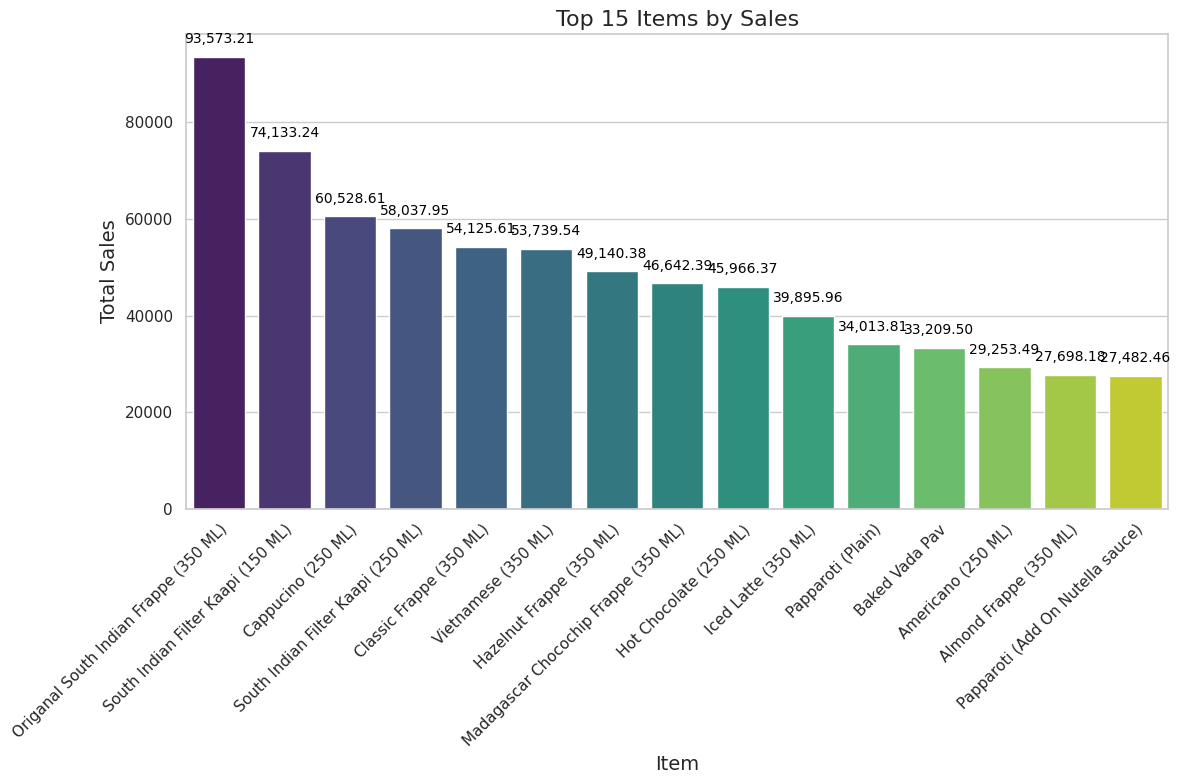

In [235]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

colors = sns.color_palette("viridis", len(top_items))

ax = sns.barplot(x=top_items.index, y=top_items.values, palette=colors)

plt.title('Top 15 Items by Sales', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Which Category contributes to the most amount of Revenue?

**Working** Groups orders made on same category as one, and sums the Total Revenue contribution by it

In [322]:
category_revenue = sales.groupby('Category')['Final Total'].sum().sort_values(ascending=False)
category_revenue

Category
Cold Coffee       590714.71
Hot Coffee        397982.93
Food Menu         134151.30
Hot Chocolate      98745.32
Sweet              86993.29
SEASONAL MENU      25821.75
Manual Brew        19072.49
Milk               13352.92
Coffee Coolers     11367.07
Coffee Beans       10025.00
Extra Toppings      6353.46
JUICES              5479.81
Savouries           1461.90
Combos [z]           975.26
Name: Final Total, dtype: float64

### Plotting the Total Revenue Contribution Per category using Barplot

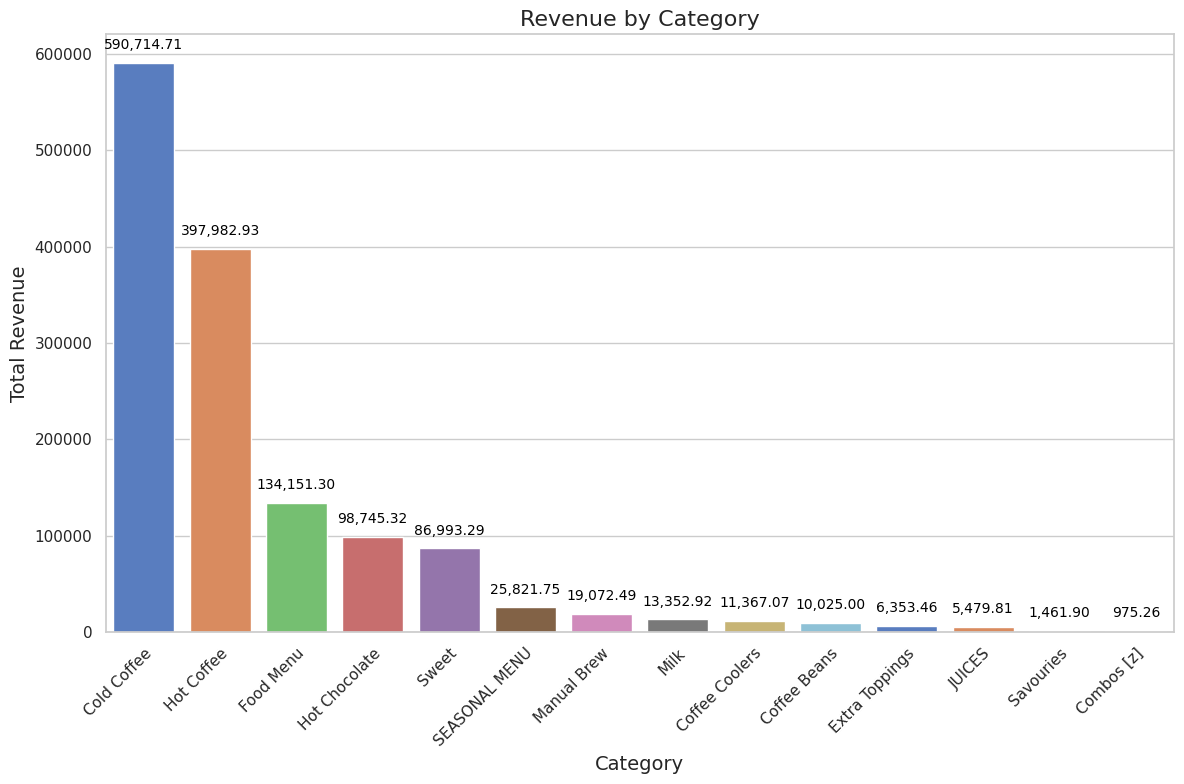

In [236]:
category_revenue = sales.groupby('Category')['Final Total'].sum().sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

colors = sns.color_palette("muted", len(category_revenue))

ax = sns.barplot(x=category_revenue.index, y=category_revenue.values, palette=colors)

plt.title('Revenue by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [22]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Date']

0     2024-01-22
1     2024-01-22
2     2024-01-22
3     2024-01-22
4     2024-01-22
         ...    
681   2024-01-20
682   2024-01-20
683   2024-01-20
684   2024-01-20
685   2024-01-20
Name: Date, Length: 686, dtype: datetime64[ns]

### What are the maximum amount of Item Quantity sold in the month (Not by revenue)

In [324]:
item_quantity = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)
item_quantity

Item Name
South Indian Filter Kaapi (150 ML)                  496
Baked Vada Pav                                      412
South Indian Filter Kaapi (250 ML)                  297
Origanal South Indian Frappe (350 ML)               292
Cappucino (250 ML)                                  250
                                                   ... 
Mix Berliner  2 Pcs (Dark Choco Mousse Berliner)      1
Bon Bon (350 Ml)                                      1
Mix Berliner  2 Pcs (Lotus Biscoff Berliner)          1
Calzone Mix 2 Pc (Calzone Veg)                        1
Mix Tartlet 9 Pcs (kodai cheese tartlet)              1
Name: Qty., Length: 192, dtype: int64

In [327]:
item_quantity = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)
item_quantity

Item Name
South Indian Filter Kaapi (150 ML)                  496
Baked Vada Pav                                      412
South Indian Filter Kaapi (250 ML)                  297
Origanal South Indian Frappe (350 ML)               292
Cappucino (250 ML)                                  250
                                                   ... 
Mix Berliner  2 Pcs (Dark Choco Mousse Berliner)      1
Bon Bon (350 Ml)                                      1
Mix Berliner  2 Pcs (Lotus Biscoff Berliner)          1
Calzone Mix 2 Pc (Calzone Veg)                        1
Mix Tartlet 9 Pcs (kodai cheese tartlet)              1
Name: Qty., Length: 192, dtype: int64

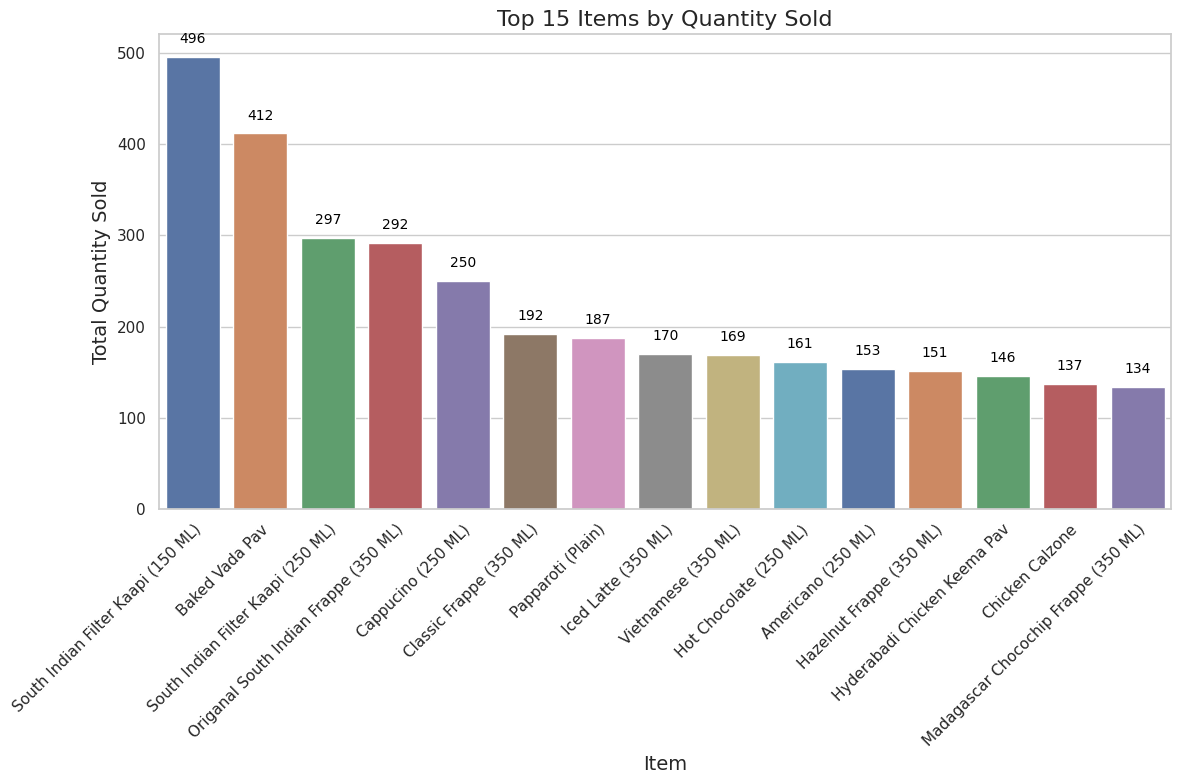

In [238]:
item_quantity = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("deep")
top_items_quantity = item_quantity.head(10)

ax = sns.barplot(x=top_items_quantity.index, y=top_items_quantity.values, palette=colors)

plt.title('Top 10 Items by Quantity Sold', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Daily Number of Transactions for a month:
**Working**: Since the data is time-series, we need to understand at what days the transactions were the most and least.  
We take 'Invoice No.' as a unique Identifier here
Group by the Date (To remove duplicates) and understand the unique number of transactions made on that day

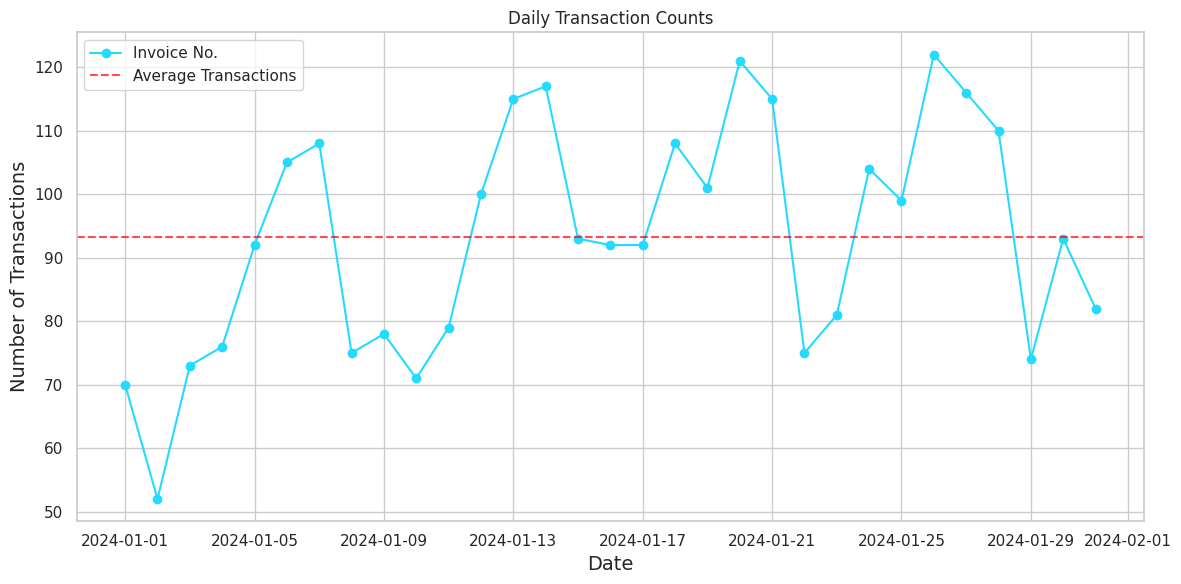

Intervals with Reduced Activity:
Date
2024-01-01    70
2024-01-02    52
2024-01-03    73
2024-01-10    71
2024-01-29    74
Name: Invoice No., dtype: int64


In [241]:
sales['Date'] = pd.to_datetime(sales['Date'])

daily_transactions = sales.groupby(sales['Date'].dt.date)['Invoice No.'].nunique()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

colors = sns.color_palette("cool")

ax = daily_transactions.plot(kind='line', marker='o', color=colors[0], title='Daily Transaction Counts')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
average_daily_transactions = daily_transactions.mean()

plt.axhline(y=average_daily_transactions, color='red', linestyle='--', label='Average Transactions', alpha=0.7)

plt.legend()

plt.tight_layout()
plt.show()

threshold = 0.8 * average_daily_transactions
reduced_activity_intervals = daily_transactions[daily_transactions < threshold]

print("Intervals with Reduced Activity:")
print(reduced_activity_intervals)


Understanding the format and data-type of dates is important because we have to send this data to Frontend

In [14]:
sales['Date'] = pd.to_datetime(sales['Date'])

daily_transactions = sales.groupby(sales['Date'].dt.date)['Invoice No.'].nunique()
print(type(sales['Date'][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [55]:
daily_transactions.index[0]

datetime.date(2024, 1, 1)

In [65]:
df_daily_transactions = pd.DataFrame({'Date': daily_transactions.index, 'Count': daily_transactions.values})
json_data = df_daily_transactions.to_json(orient='records', date_format='iso')
json_data

'[{"Date":"2024-01-01T00:00:00.000","Count":70},{"Date":"2024-01-02T00:00:00.000","Count":52},{"Date":"2024-01-03T00:00:00.000","Count":73},{"Date":"2024-01-04T00:00:00.000","Count":76},{"Date":"2024-01-05T00:00:00.000","Count":92},{"Date":"2024-01-06T00:00:00.000","Count":105},{"Date":"2024-01-07T00:00:00.000","Count":108},{"Date":"2024-01-08T00:00:00.000","Count":75},{"Date":"2024-01-09T00:00:00.000","Count":78},{"Date":"2024-01-10T00:00:00.000","Count":71},{"Date":"2024-01-11T00:00:00.000","Count":79},{"Date":"2024-01-12T00:00:00.000","Count":100},{"Date":"2024-01-13T00:00:00.000","Count":115},{"Date":"2024-01-14T00:00:00.000","Count":117},{"Date":"2024-01-15T00:00:00.000","Count":93},{"Date":"2024-01-16T00:00:00.000","Count":92},{"Date":"2024-01-17T00:00:00.000","Count":92},{"Date":"2024-01-18T00:00:00.000","Count":108},{"Date":"2024-01-19T00:00:00.000","Count":101},{"Date":"2024-01-20T00:00:00.000","Count":121},{"Date":"2024-01-21T00:00:00.000","Count":115},{"Date":"2024-01-22T00:

Simplified the JSON

In [62]:

for day_number in range(1, 32):
    json_data = json_data.replace(f'"2024-01-{day_number:02}T00:00:00.000"', str(day_number))

print(json_data)

[{"Date":1,"Count":70},{"Date":2,"Count":52},{"Date":3,"Count":73},{"Date":4,"Count":76},{"Date":5,"Count":92},{"Date":6,"Count":105},{"Date":7,"Count":108},{"Date":8,"Count":75},{"Date":9,"Count":78},{"Date":10,"Count":71},{"Date":11,"Count":79},{"Date":12,"Count":100},{"Date":13,"Count":115},{"Date":14,"Count":117},{"Date":15,"Count":93},{"Date":16,"Count":92},{"Date":17,"Count":92},{"Date":18,"Count":108},{"Date":19,"Count":101},{"Date":20,"Count":121},{"Date":21,"Count":115},{"Date":22,"Count":75},{"Date":23,"Count":81},{"Date":24,"Count":104},{"Date":25,"Count":99},{"Date":26,"Count":122},{"Date":27,"Count":116},{"Date":28,"Count":110},{"Date":29,"Count":74},{"Date":30,"Count":93},{"Date":31,"Count":82}]


In [31]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Covers',
       'Variation', 'Category', 'Phone', 'Name', 'Address', 'Assign To',
       'Non Taxable', 'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount',
       'VAT Rate', 'VAT Amount'],
      dtype='object')

# Insights from Payment type

### Insights Related to Payment Types (Good to Have)

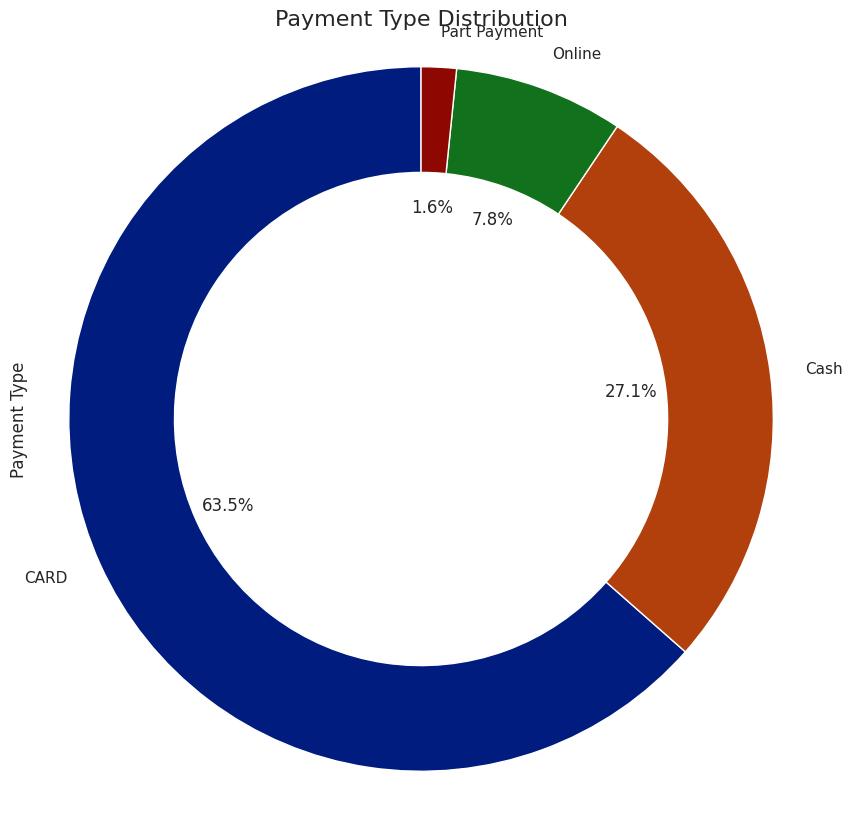

In [237]:
payment_distribution = sales['Payment Type'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

colors = sns.color_palette("dark")

ax = payment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

plt.title('Payment Type Distribution', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## What is the total revenue for a payment type

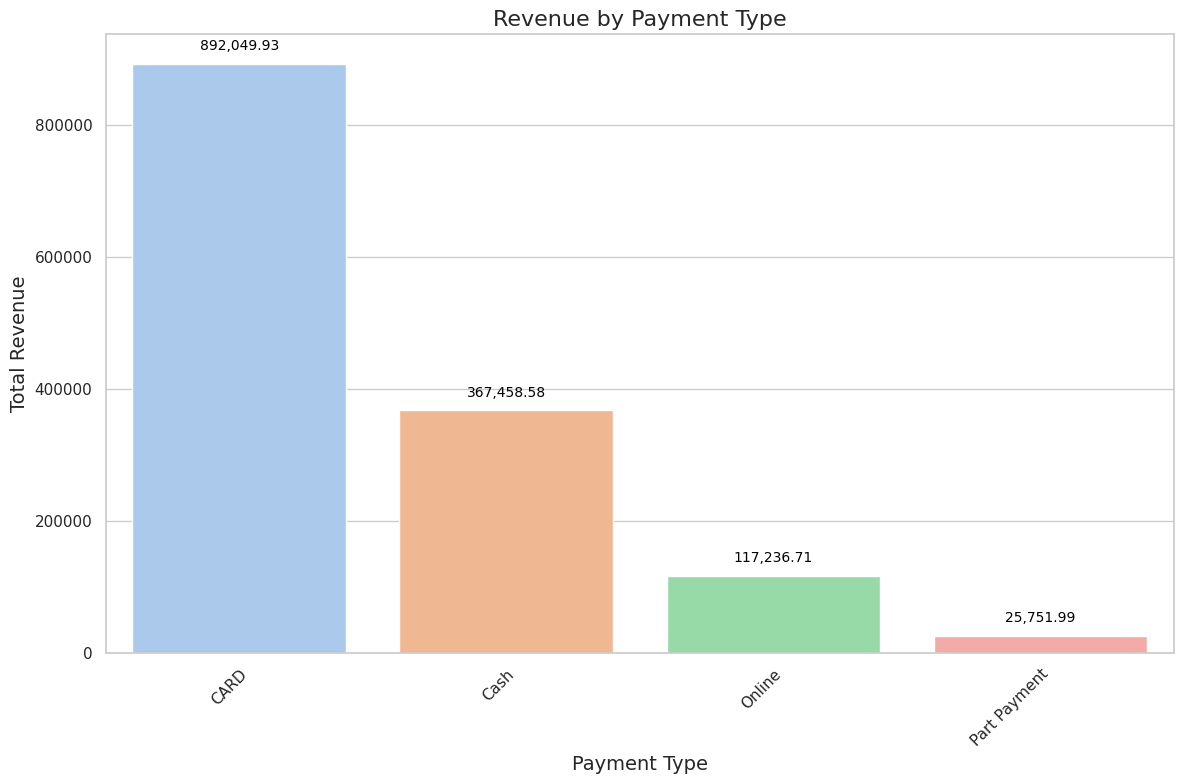

In [242]:

revenue_by_payment = sales.groupby('Payment Type')['Final Total'].sum().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("pastel")

ax = sns.barplot(x=revenue_by_payment.index, y=revenue_by_payment.values, palette=colors)

plt.title('Revenue by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## What is the average order value for a particular payment type?

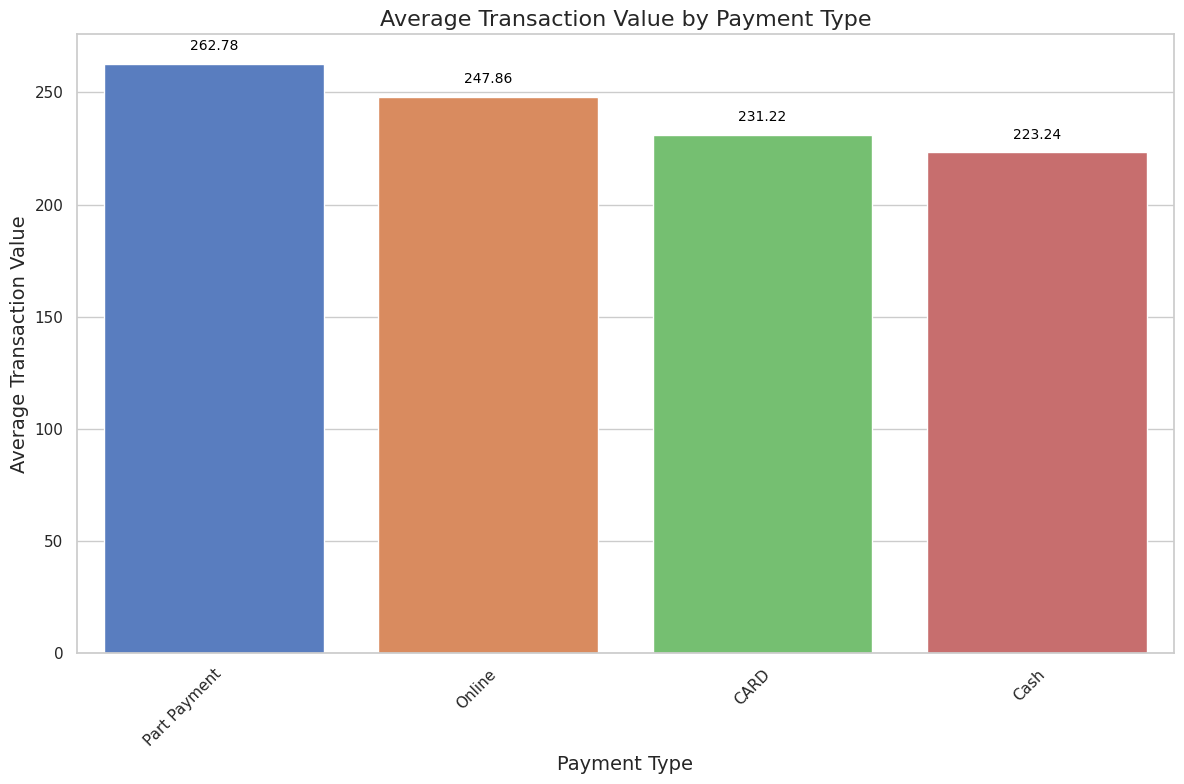

In [243]:


avg_transaction_value = sales.groupby('Payment Type')['Final Total'].mean().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("muted")

ax = sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette=colors)

plt.title('Average Transaction Value by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Average Transaction Value', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()


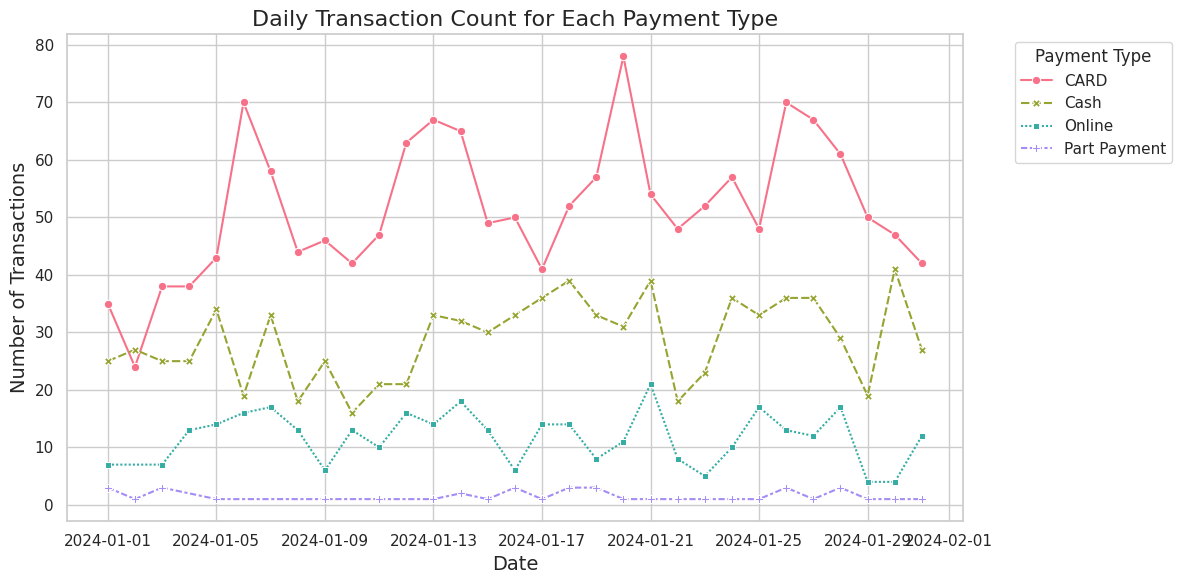

In [244]:

sales['Date'] = pd.to_datetime(sales['Date'])

daily_transactions_by_payment = sales.groupby(['Date', 'Payment Type'])['Invoice No.'].nunique().unstack()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

colors = sns.color_palette("husl", n_colors=len(daily_transactions_by_payment.columns))

ax = sns.lineplot(data=daily_transactions_by_payment, markers=True, palette=colors)

plt.title('Daily Transaction Count for Each Payment Type', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [37]:
sales['Payment Type'].unique()

array(['CARD', 'Cash', 'Online', 'Part Payment'], dtype=object)

### For each item, what medium does the customers prefer to pay

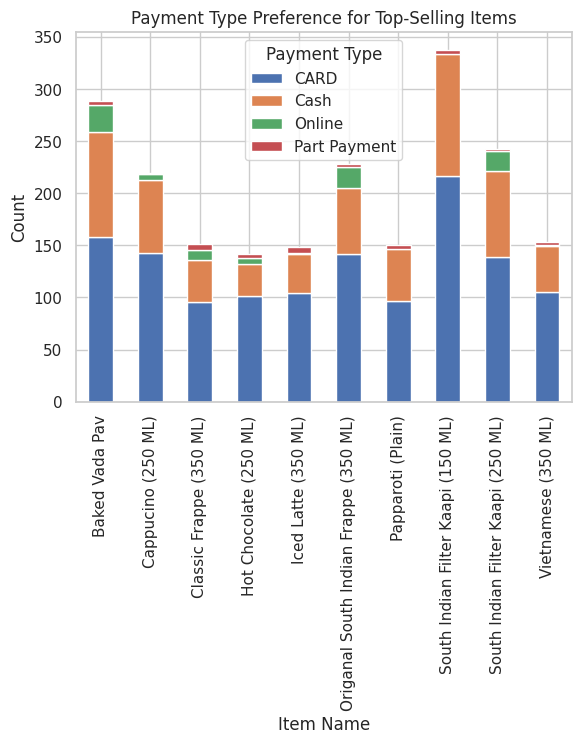

In [248]:
top_selling_items = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head(10)

payment_preference_for_top_items = pd.crosstab(sales[sales['Item Name'].isin(top_selling_items.index)]['Item Name'],
                                               sales['Payment Type'], margins=True, margins_name='Total')

payment_preference_for_top_items = payment_preference_for_top_items.drop('Total', axis=1).drop('Total', axis=0)

payment_preference_for_top_items.plot(kind='bar', stacked=True, title='Payment Type Preference for Top-Selling Items')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.show()


In [64]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount'],
      dtype='object')

### Getting an overview of different columns

In [44]:
sales['Order Type'].unique()

array(['Dine In', 'Pick Up', 'Delivery(Parcel)'], dtype=object)

In [59]:
sales['Status'].value_counts()

Success          611
Complimentary     74
Cancelled          1
Name: Status, dtype: int64

In [67]:
sales['Variation']

0                        NaN
1                     350 ML
2      Add On Tiramisu Syrup
3                        NaN
4                     250 ML
               ...          
681     Add On Nutella sauce
682                      NaN
683                   250 ML
684                      NaN
685                   350 ML
Name: Variation, Length: 686, dtype: object

# Insights from Oder Type

In [70]:
sales['Category'].unique()

array(['Manual Brew', 'Cold Coffee', 'Extra Toppings', 'Food Menu',
       'Hot Coffee', 'Hot Chocolate', 'Milk', 'Savouries', 'Sweet',
       'SEASONAL MENU', 'Coffee Coolers'], dtype=object)

### How many orders placed for every order-type?

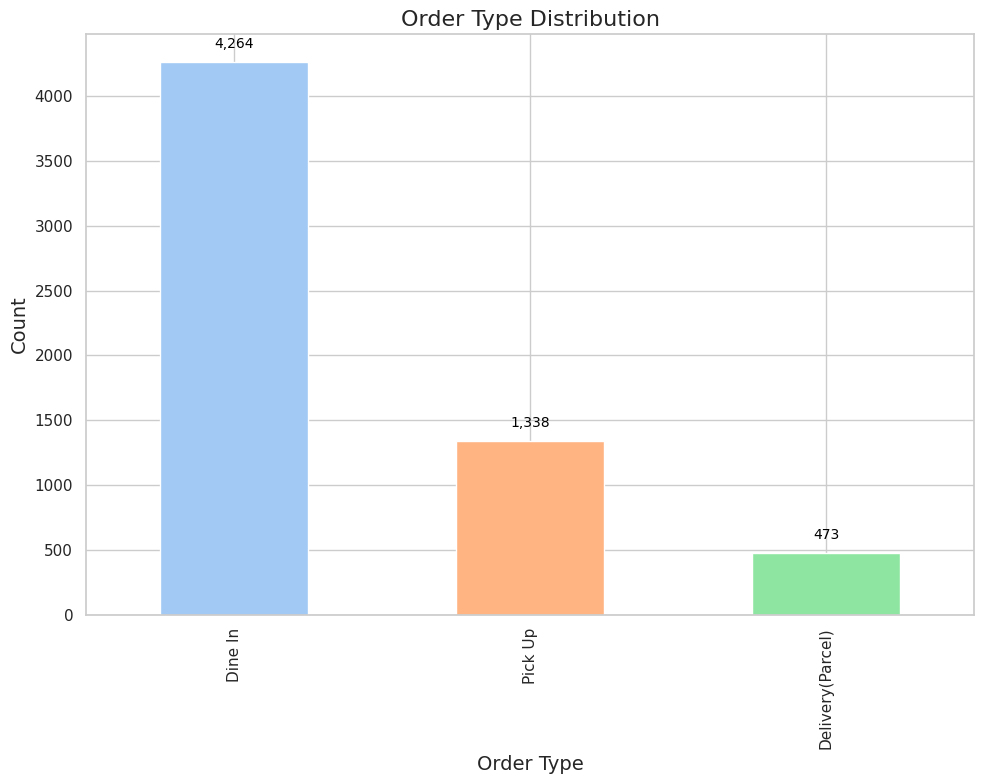

In [249]:
plt.figure(figsize=(10, 8))
order_type_distribution = sales['Order Type'].value_counts()

colors = sns.color_palette("pastel")

ax = order_type_distribution.plot(kind='bar', color=colors)

plt.title('Order Type Distribution', fontsize=16)
plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()


### How much each order-type contributes in revenue??

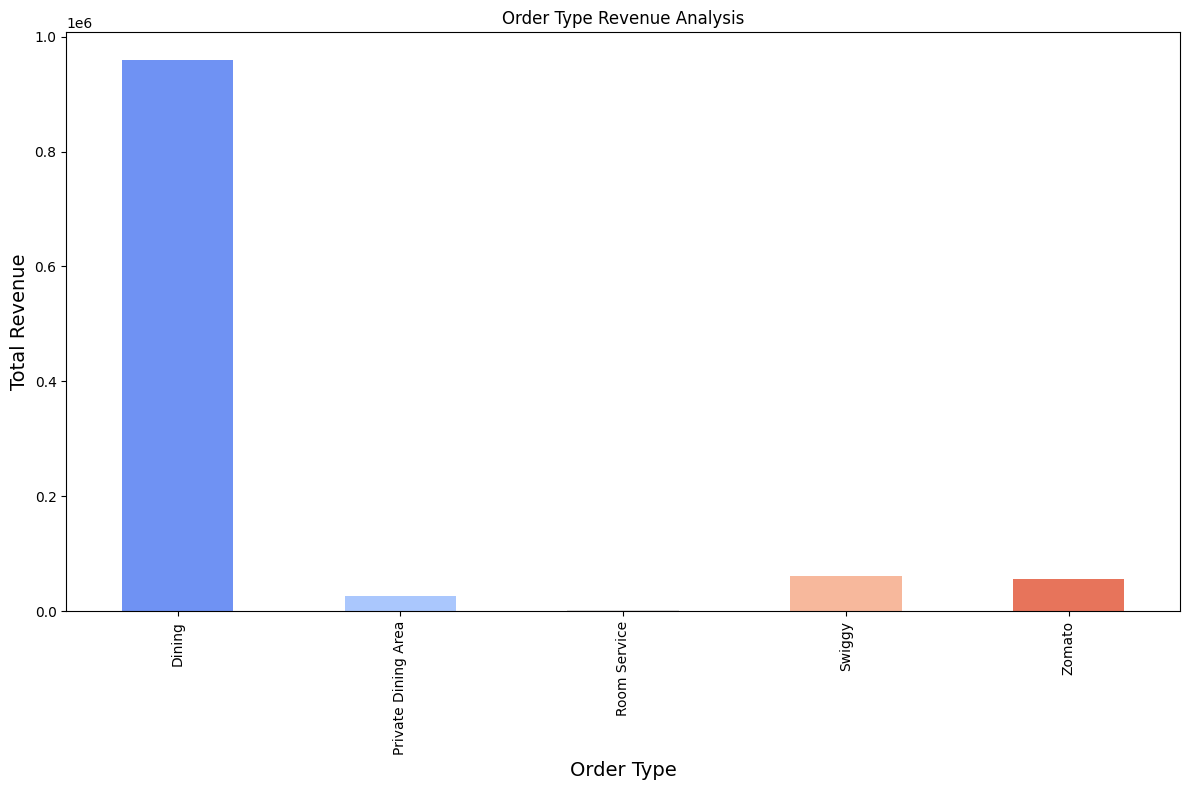

In [17]:
order_type_revenue_analysis = sales.groupby('Area')['Final Total'].sum()

plt.figure(figsize=(12, 8))

colors_revenue = sns.color_palette("coolwarm", n_colors=len(order_type_revenue_analysis))

ax_revenue = order_type_revenue_analysis.plot(kind='bar', color=colors_revenue, title='Order Type Revenue Analysis')

plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.tight_layout()
plt.show()

## What is the Average Order Value for each medium of ordering food?

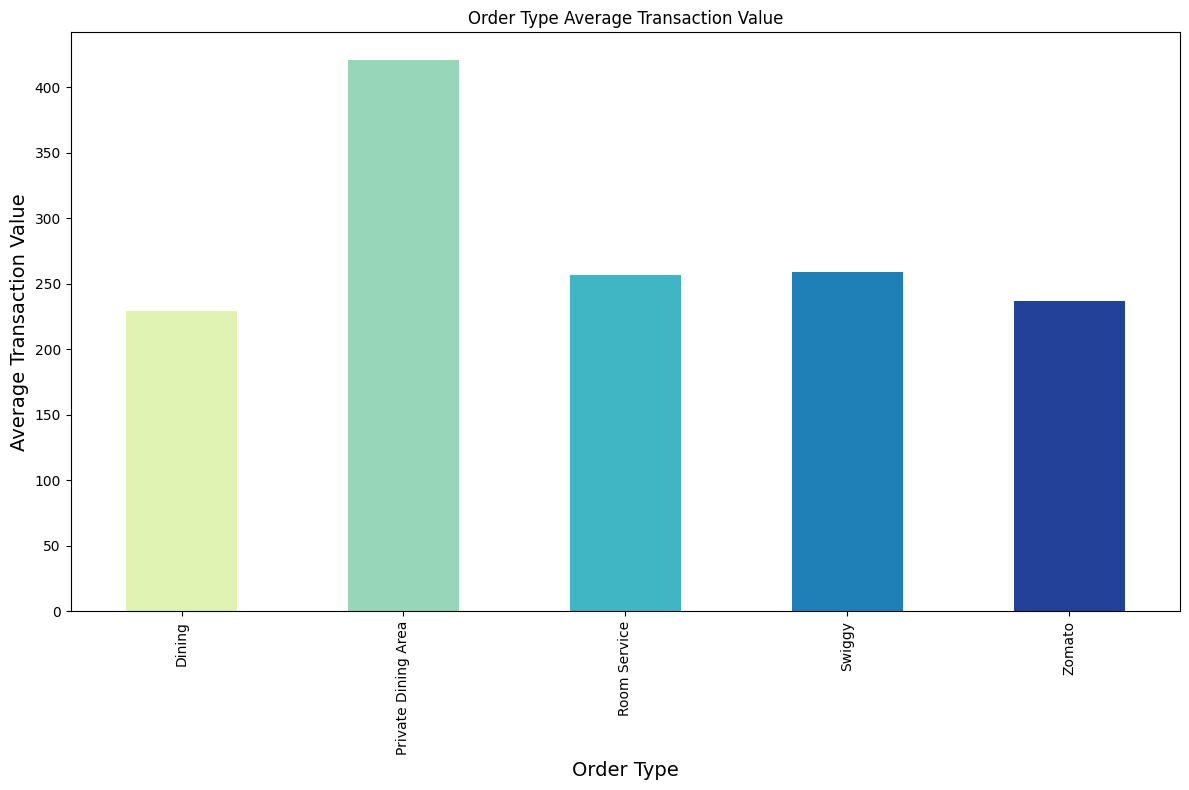

In [16]:
order_type_avg_transaction = sales.groupby('Area')['Final Total'].mean()

plt.figure(figsize=(12, 8))

colors_avg_transaction = sns.color_palette("YlGnBu", n_colors=len(order_type_avg_transaction))

ax_avg_transaction = order_type_avg_transaction.plot(kind='bar', color=colors_avg_transaction, title='Order Type Average Transaction Value')

plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Average Transaction Value', fontsize=14)

plt.tight_layout()
plt.show()

### We will prefer 'Area' column for analysis as it has more variations and can lead to more niche insights

In [75]:
sales['Order Type'].value_counts()

Dine In             454
Pick Up             180
Delivery(Parcel)     52
Name: Order Type, dtype: int64

In [77]:
sales['Area'].value_counts()

Dining                 445
Swiggy                  31
Zomato                  21
Private Dining Area      9
Name: Area, dtype: int64

In [55]:
sales['Area'].unique()

array(['Dining', nan, 'Swiggy', 'Zomato', 'Private Dining Area'],
      dtype=object)

In [71]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount'],
      dtype='object')

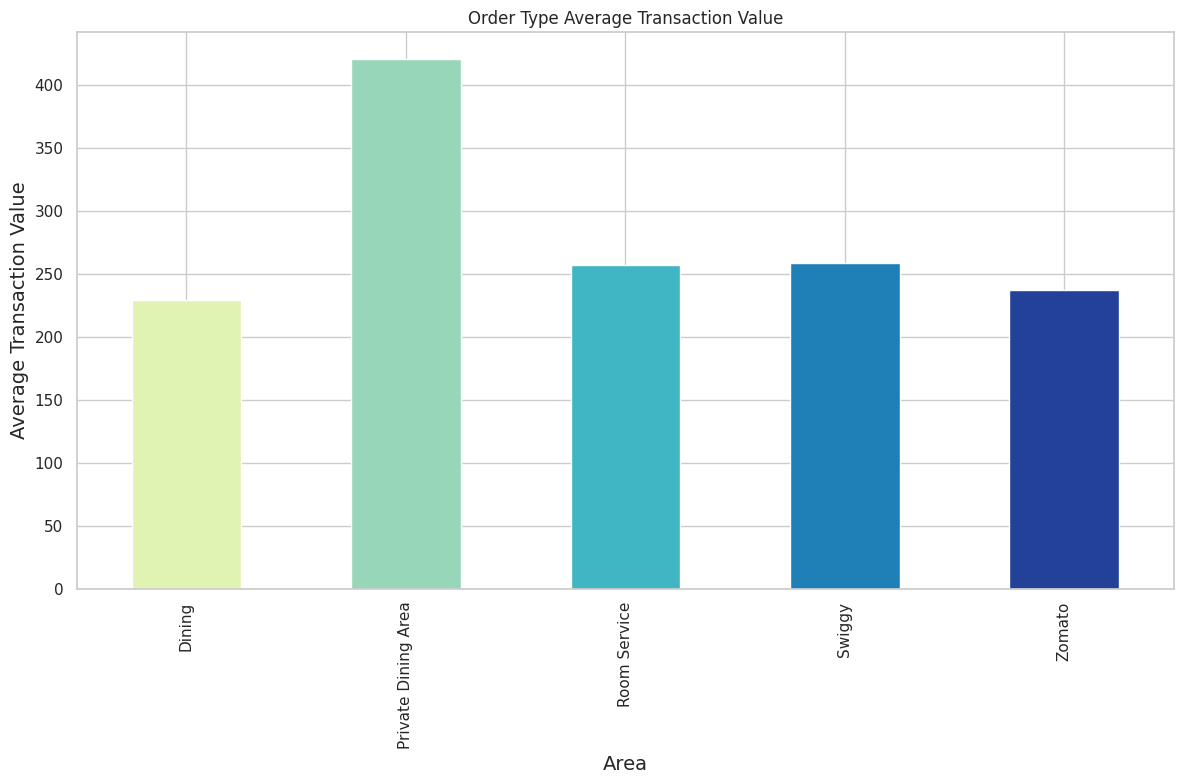

In [253]:
order_type_avg_transaction = sales.groupby('Area')['Final Total'].mean()

plt.figure(figsize=(12, 8))

colors_avg_transaction_area = sns.color_palette("YlGnBu", n_colors=len(order_type_avg_transaction))

ax_avg_transaction_area = order_type_avg_transaction.plot(kind='bar', color=colors_avg_transaction_area, title='Order Type Average Transaction Value')

plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Transaction Value', fontsize=14)

plt.tight_layout()
plt.show()


In [82]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount'],
      dtype='object')

### What is the average price distribution of the products

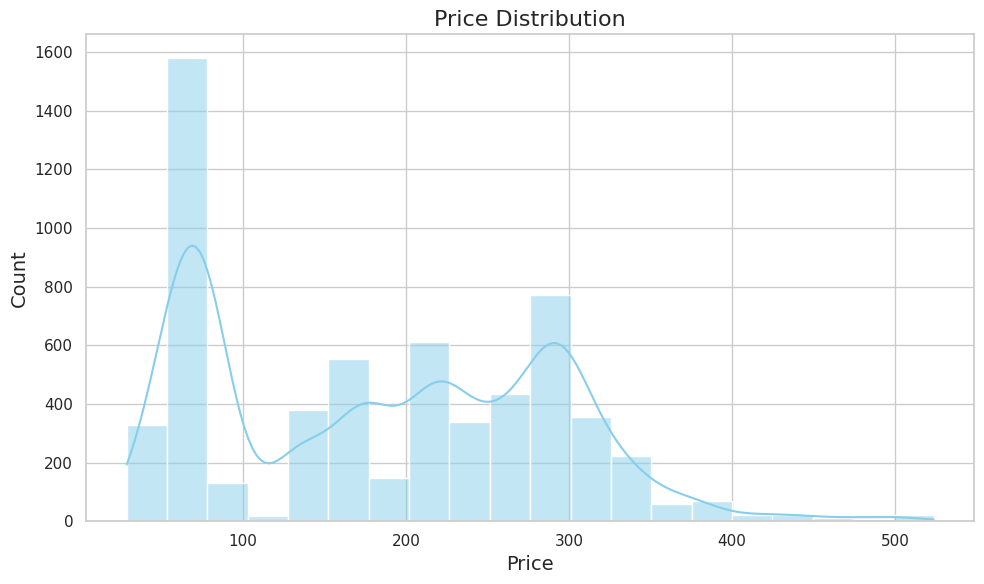

In [254]:
plt.figure(figsize=(10, 6))

sns.histplot(sales['Price'], bins=20, kde=True, color='skyblue')

plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


### Columns Important for ML

In [101]:
selected_columns = ['Payment Type', 'Order Type', 'Area', 'Qty.', 'Final Total', 'Category']

new_df = sales[selected_columns]


In [103]:
sales['Order Type'].value_counts()

Dine In             454
Pick Up             180
Delivery(Parcel)     52
Name: Order Type, dtype: int64

## Customer Segmentation

**Segmenting Customers based on their behaviour, (How much they spend, how much they buy)**
###### Then, from these insights we calculate what are the most frequently ordered categories by them

In [15]:
# Assuming 'Phone' is a unique identifier for customers
customer_segments = sales.groupby('Phone').agg({
    'Final Total': 'sum',
    'Qty.': 'sum',
    'Category': lambda x: x.mode().iat[0],
}).reset_index()


In [16]:
customer_segments

Phone  Final Total  Qty.       Category
0    3.000000e+00      8714.40    30    Cold Coffee
1    1.010101e+08       176.19     1     Hot Coffee
2    5.650998e+08       341.25     1     Hot Coffee
3    1.111111e+09       861.89     7      Food Menu
4    1.111111e+09     12057.08    82     Hot Coffee
..            ...          ...   ...            ...
457  9.979738e+09       166.67     1          Sweet
458  9.981801e+09       295.71     1  Hot Chocolate
459  9.987337e+09      1319.75     5     Hot Coffee
460  9.998045e+09       334.05     1    Cold Coffee
461  9.999497e+09       722.84     4      Food Menu

[462 rows x 4 columns]

Grouping categories and counting customers segmented in each

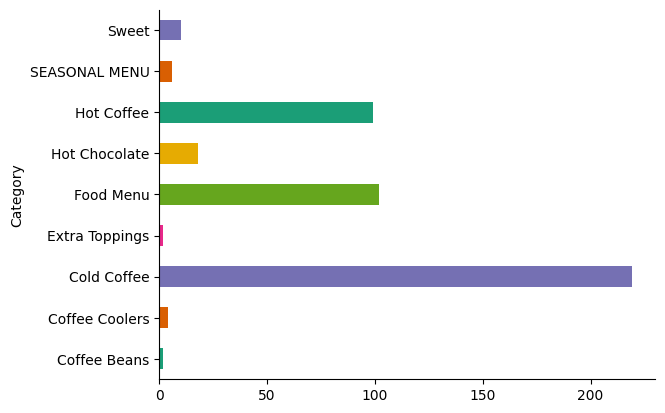

In [18]:

from matplotlib import pyplot as plt
import seaborn as sns
customer_segments.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
customer_segments.groupby('Category').size()

plt.gca().spines[['top', 'right',]].set_visible(False)

### How many repeat purchases are done

In [33]:
# Example: Calculate repeat purchase rate for each segment
repeat_purchase_rate = sales.groupby('Phone')['Date'].nunique().value_counts(normalize=True)
a = repeat_purchase_rate*100
a

1     78.354978
2      7.792208
3      2.597403
4      2.380952
6      1.731602
8      1.515152
9      1.298701
14     0.865801
12     0.649351
7      0.649351
5      0.432900
16     0.432900
10     0.432900
11     0.216450
13     0.216450
20     0.216450
24     0.216450
Name: Date, dtype: float64

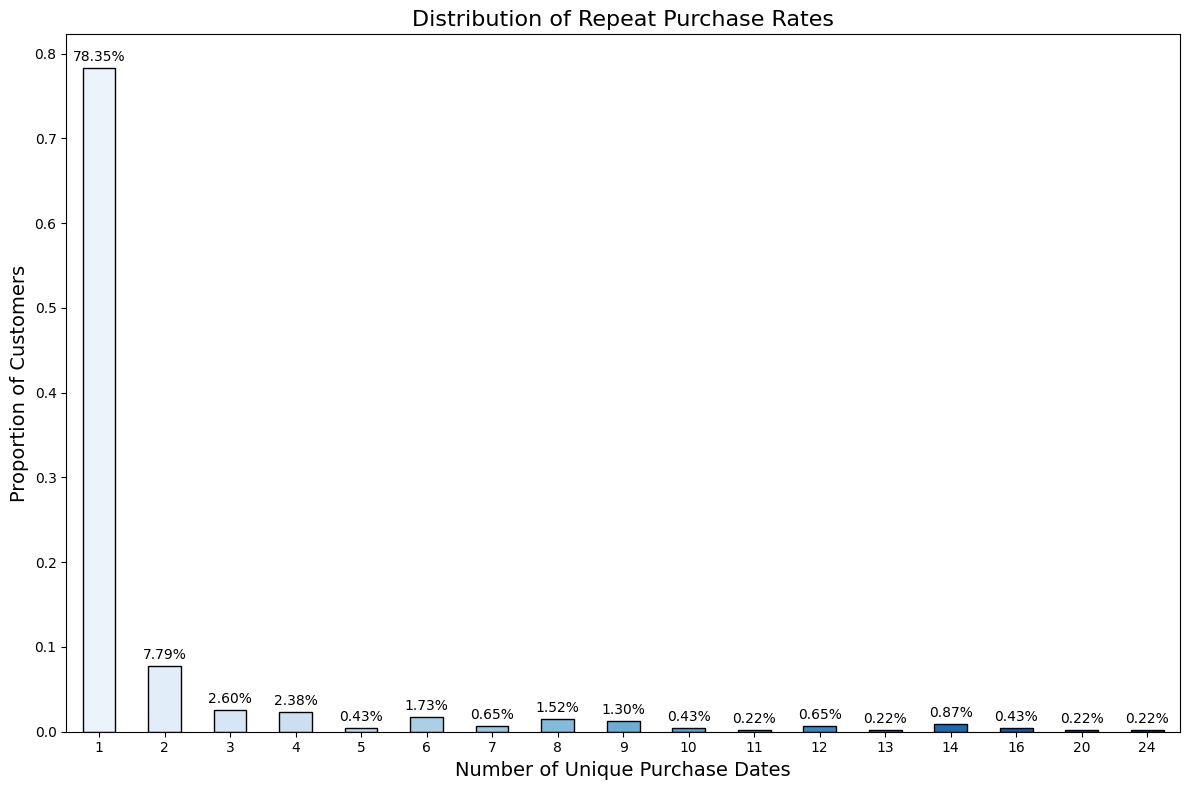

In [26]:
plt.figure(figsize=(12, 8))

colors_repeat_purchase = sns.color_palette("Blues", n_colors=len(repeat_purchase_rate))

ax_repeat_purchase = repeat_purchase_rate.sort_index().plot(kind='bar', color=colors_repeat_purchase, edgecolor='black', linewidth=1)

plt.title('Distribution of Repeat Purchase Rates', fontsize=16)
plt.xlabel('Number of Unique Purchase Dates', fontsize=14)
plt.ylabel('Proportion of Customers', fontsize=14)

plt.xticks(rotation=0, ha='center')

for p in ax_repeat_purchase.patches:
    ax_repeat_purchase.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

plt.tight_layout()
plt.show()

## Customer Lifetime Value Distribution


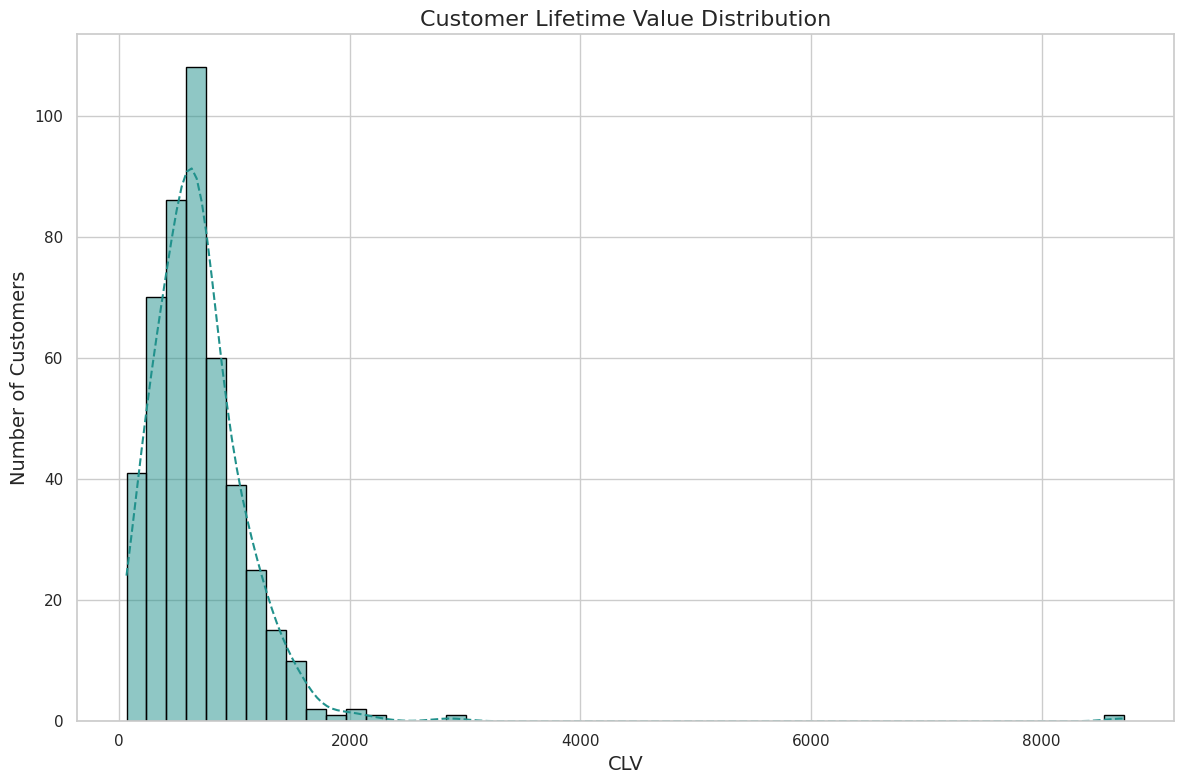

In [263]:
clv_data = sales.groupby('Phone').agg({
    'Final Total': 'sum',
    'Date': ['min', 'max', 'nunique']
})

# Calculate CLV as the average spend per visit multiplied by the number of visits
clv_data['CLV'] = clv_data['Final Total']['sum'] / clv_data['Date']['nunique']

plt.figure(figsize=(12, 8))

colors_clv = sns.color_palette("viridis", n_colors=1)

ax_clv = sns.histplot(clv_data['CLV'], bins=50, color=colors_clv[0], kde=True, edgecolor='black', linewidth=1)

plt.title('Customer Lifetime Value Distribution', fontsize=16)
plt.xlabel('CLV', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

for line in ax_clv.lines:
    line.set_linestyle('--')

plt.tight_layout()
plt.show()


## Hourly Sales Trend

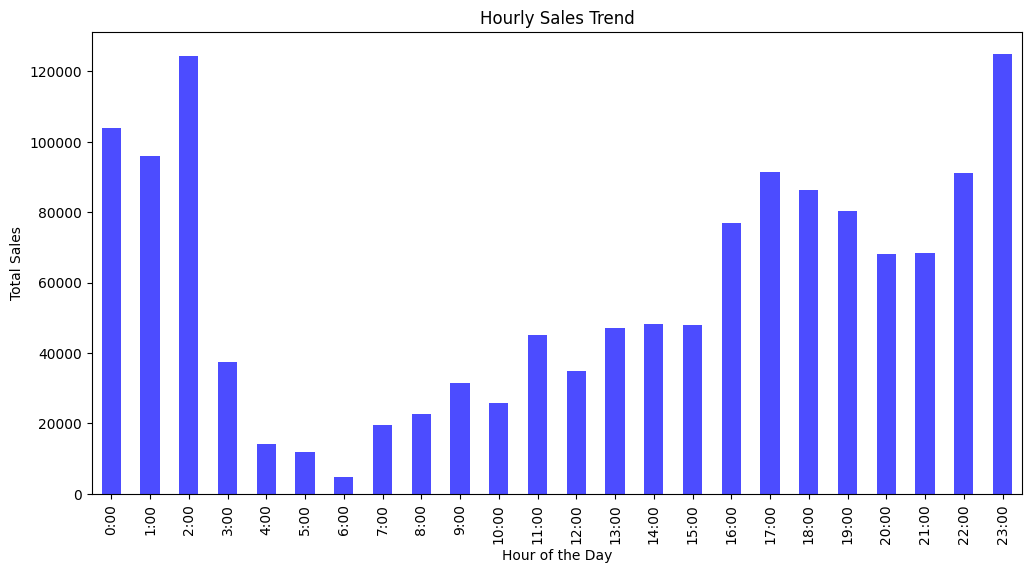

In [69]:
import matplotlib.pyplot as plt

# Assuming 'sales' is your DataFrame
sales['Timestamp'] = pd.to_datetime(sales['Timestamp'])
sales['HourOfDay'] = sales['Timestamp'].dt.hour

hourly_sales = sales.groupby('HourOfDay')['Final Total'].sum()

# Set the tick positions and labels for each hour
unique_hours = sorted(sales['HourOfDay'].unique())

# Plot the data
plt.figure(figsize=(12, 6))
hourly_sales.loc[unique_hours].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(len(unique_hours)), [f'{hour}:00' for hour in unique_hours])
plt.show()


In [ ]:
%pip install

In [137]:
selected_columns = ['Payment Type', 'Order Type', 'Area', 'Qty.', 'Category', 'Final Total']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Using H2o AutoML

In [139]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(sales[selected_columns])

# Specify categorical columns for label encoding
categorical_columns = ['Payment Type', 'Order Type', 'Area', 'Category']

# Convert categorical columns to factors (label encoding)
for col in categorical_columns:
    h2o_df[col] = h2o_df[col].asfactor()

# Specify predictor and response columns
predictors = categorical_columns + ['Qty.']
response = 'Final Total'

# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=predictors, y=response, training_frame=h2o_df)

# View the leaderboard
lb = aml.leaderboard
print(lb)


Checking whether there is an H2O instance running at http://localhost:54321.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         4 mins 34 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 27 days
H2O_cluster_name:           H2O_from_python_unknownUser_39ernz
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240217_74835     65.7598  4324.35  40.3326    0.515412                   4324.35
GBM_4_AutoML_1_20240217_74835                           65.775   4326.35  40.8627    0.515214                   4326.35
GBM_2_AutoML_1_20240217_74835                           65.967   4351.65  41.4844    0.515615                   4351.65
StackedEnsemble_BestOfFamily_1_AutoML_1_20240217_74835  65.9734  4352.49  40.3811    0.515234                   4352.49
GBM_3_AutoML_1_20240217_74835                           66.3972  4408.59  41.0815    0.516991                   4408.59
XGBoost_3_AutoML_1_20240217_74835                       69.407   4817.33  42.7912    0.523

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

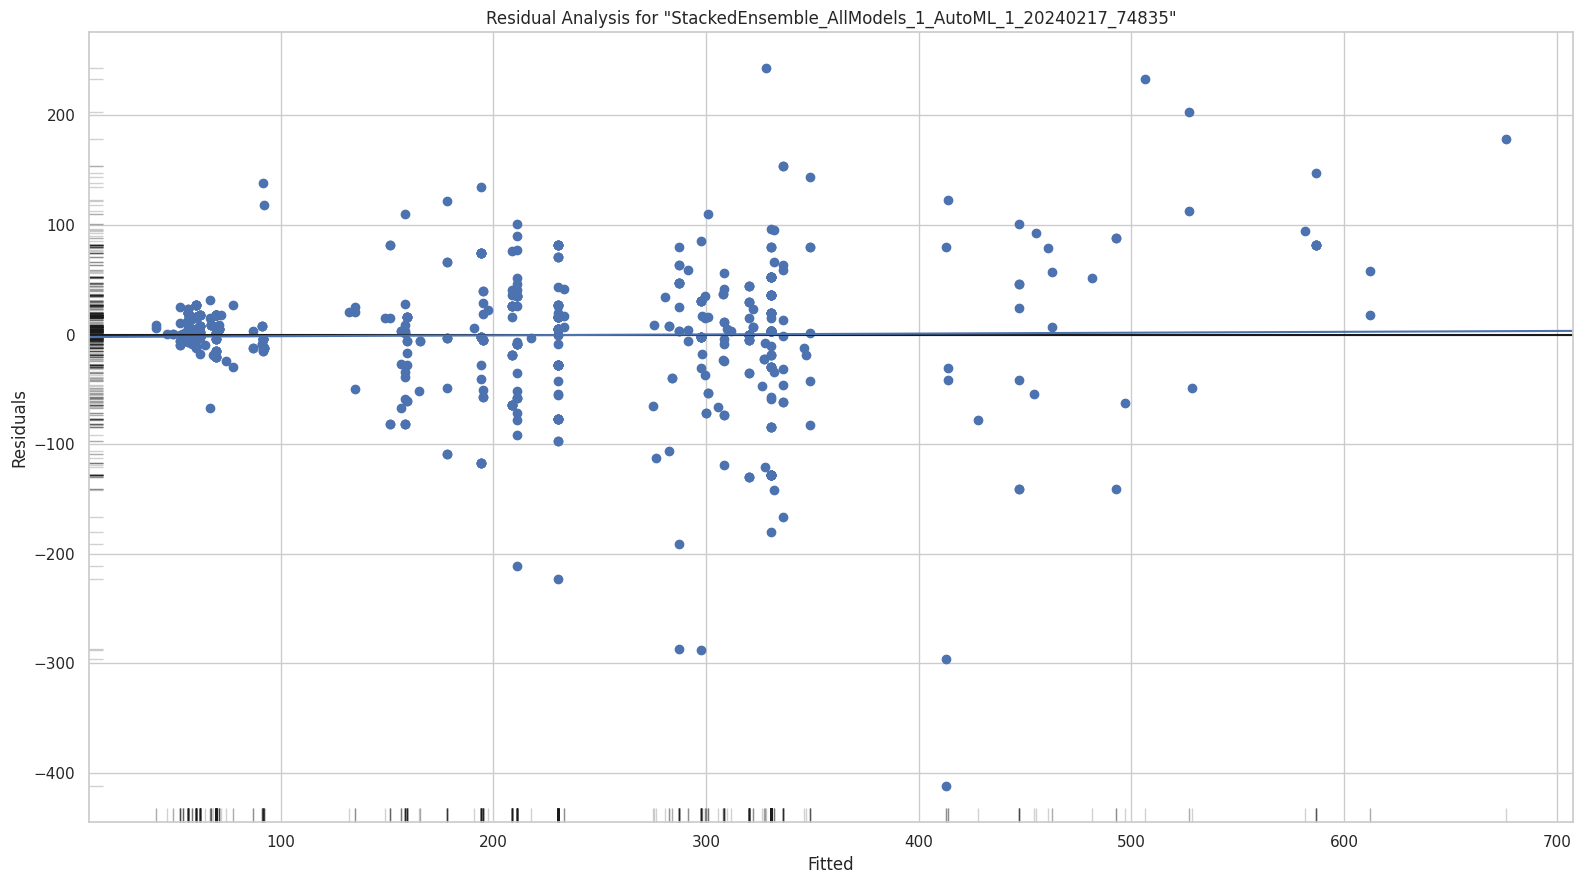

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

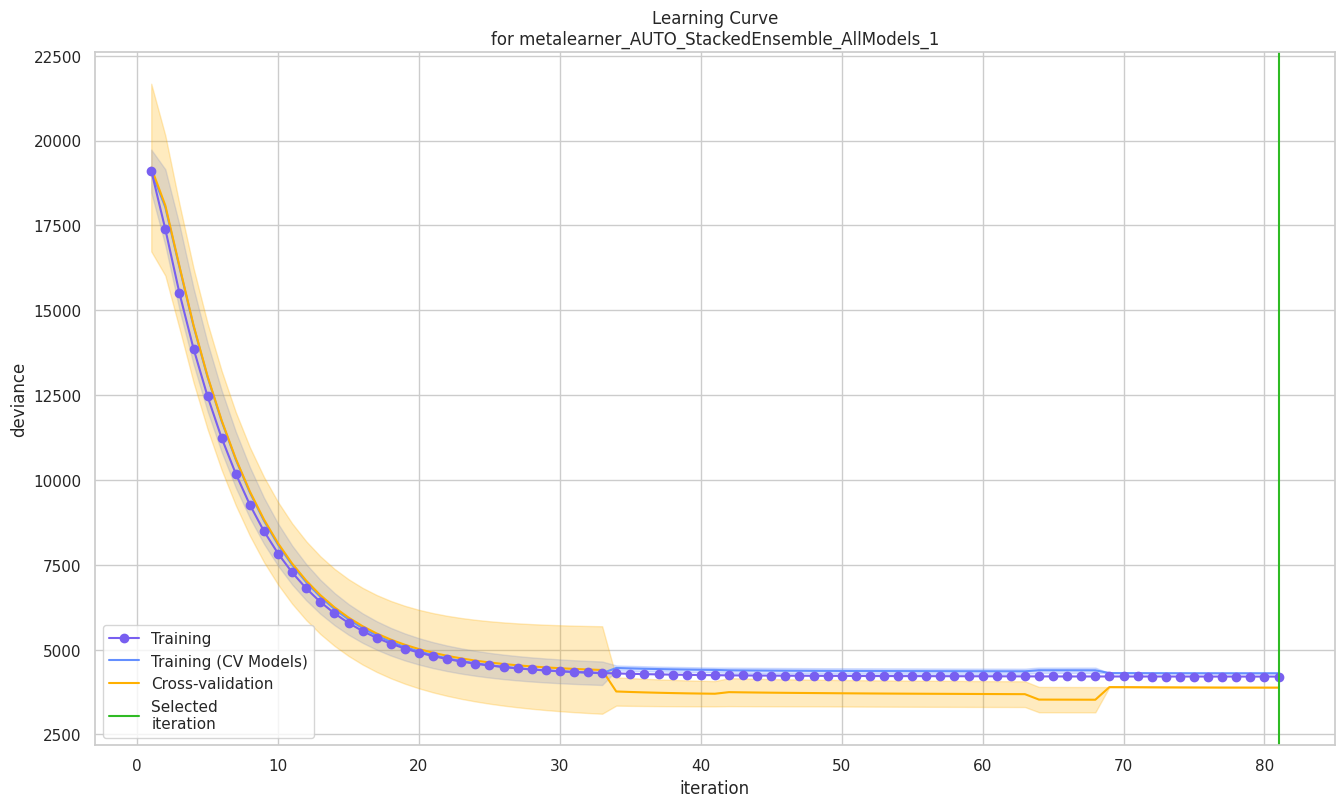

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

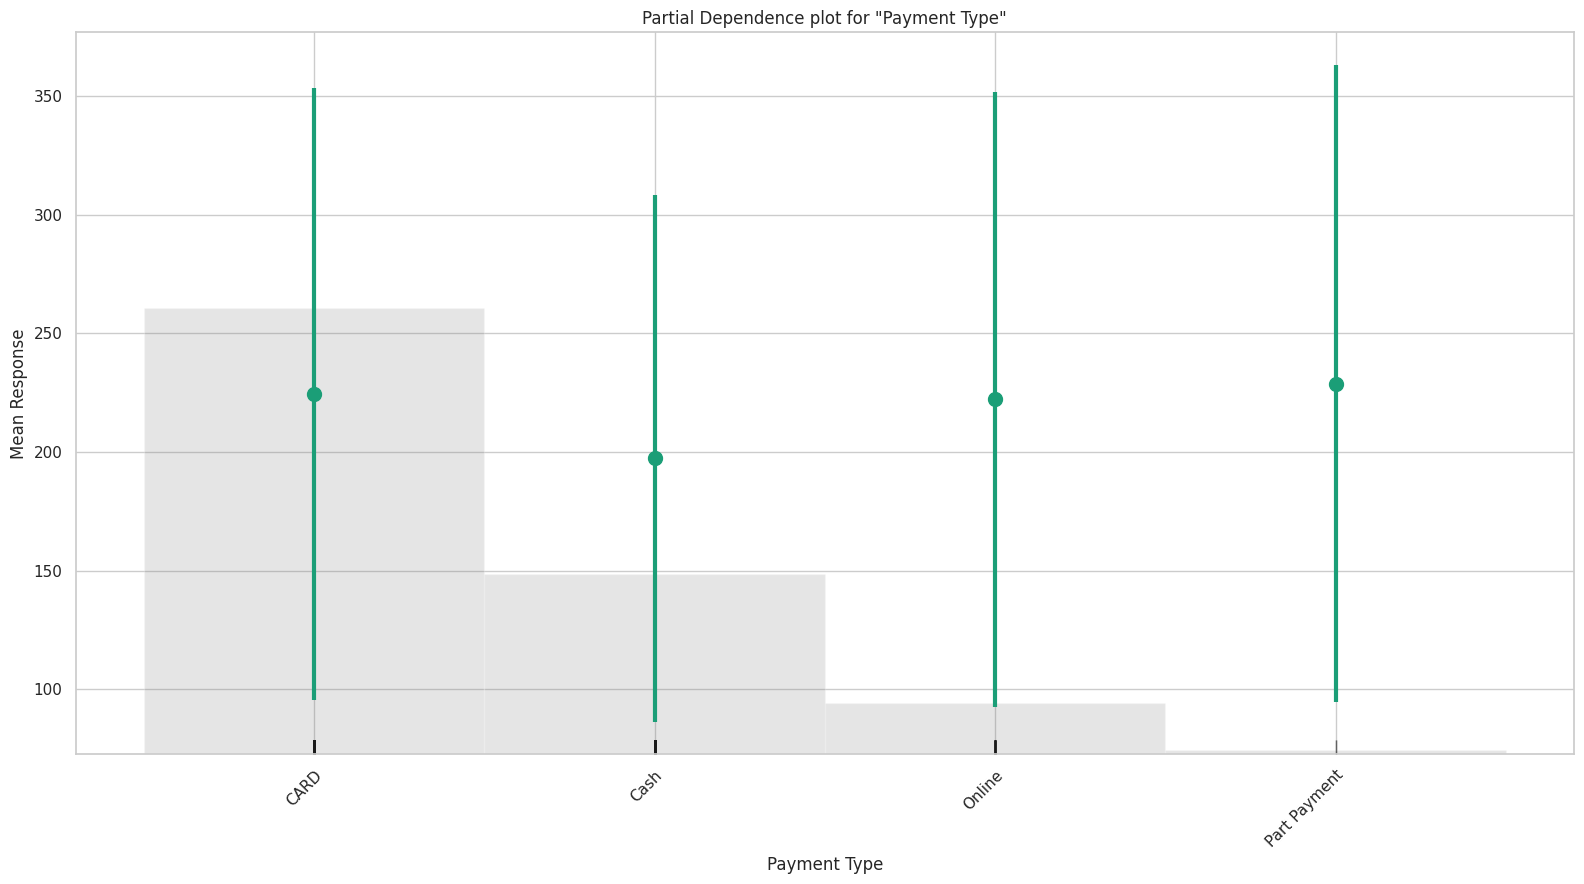

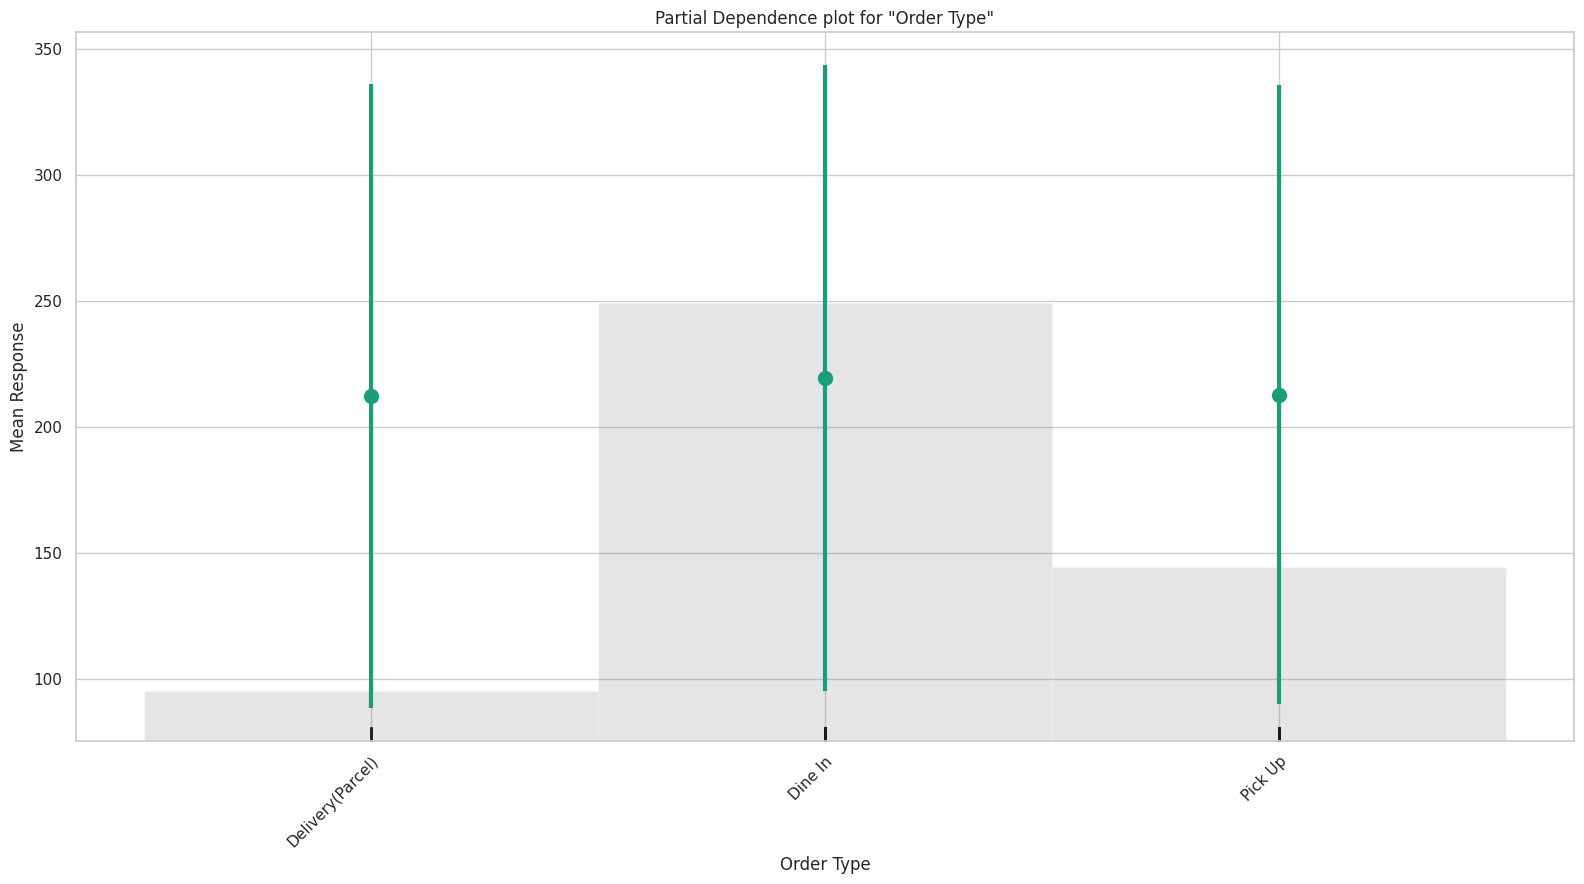

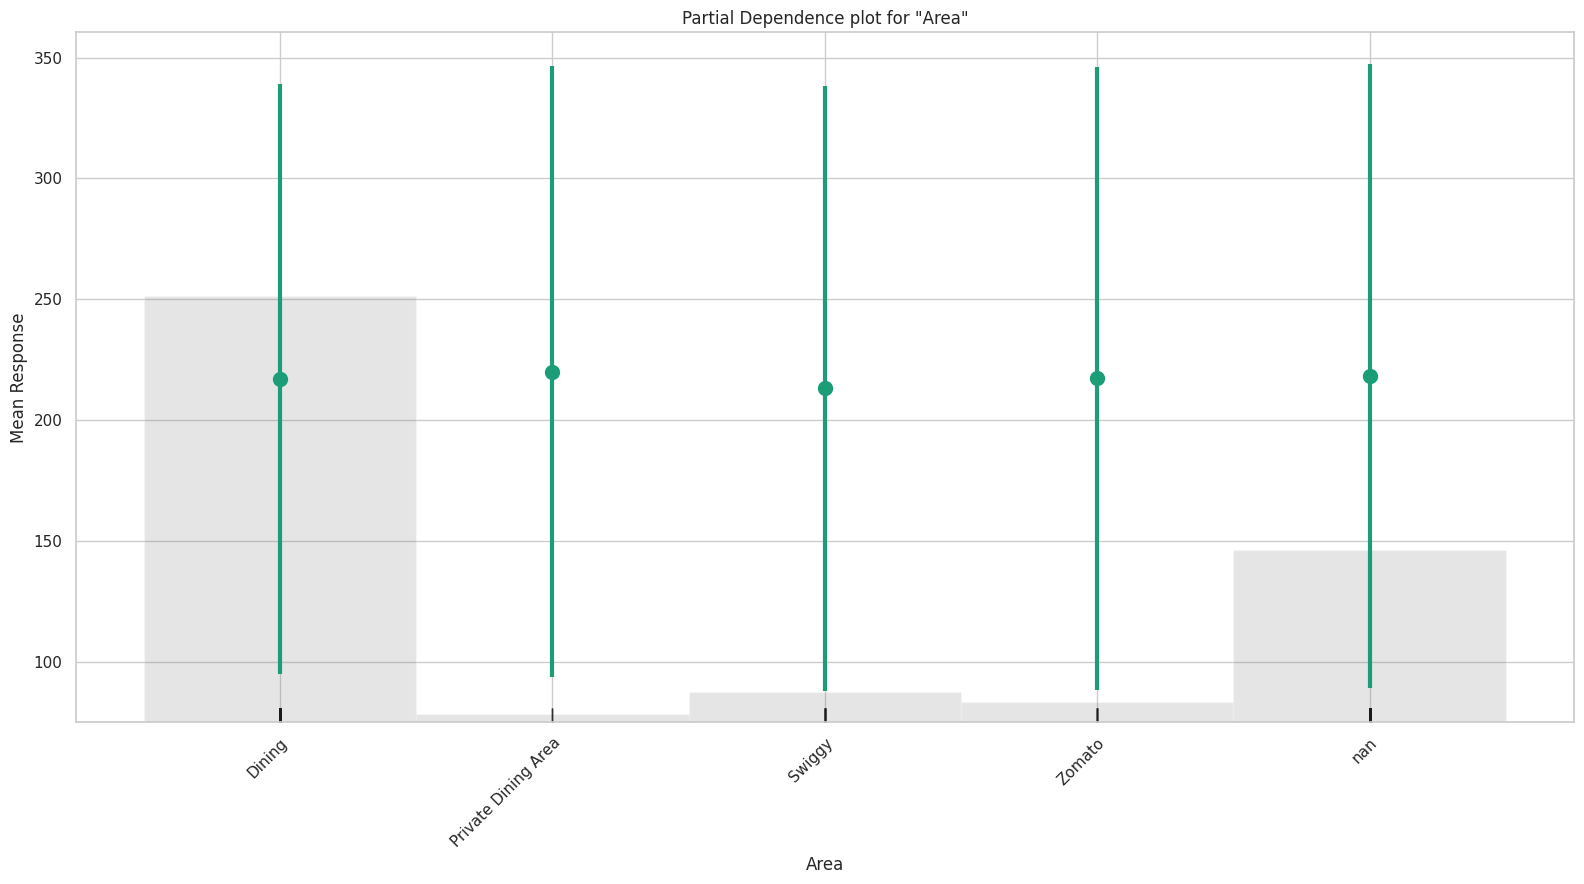

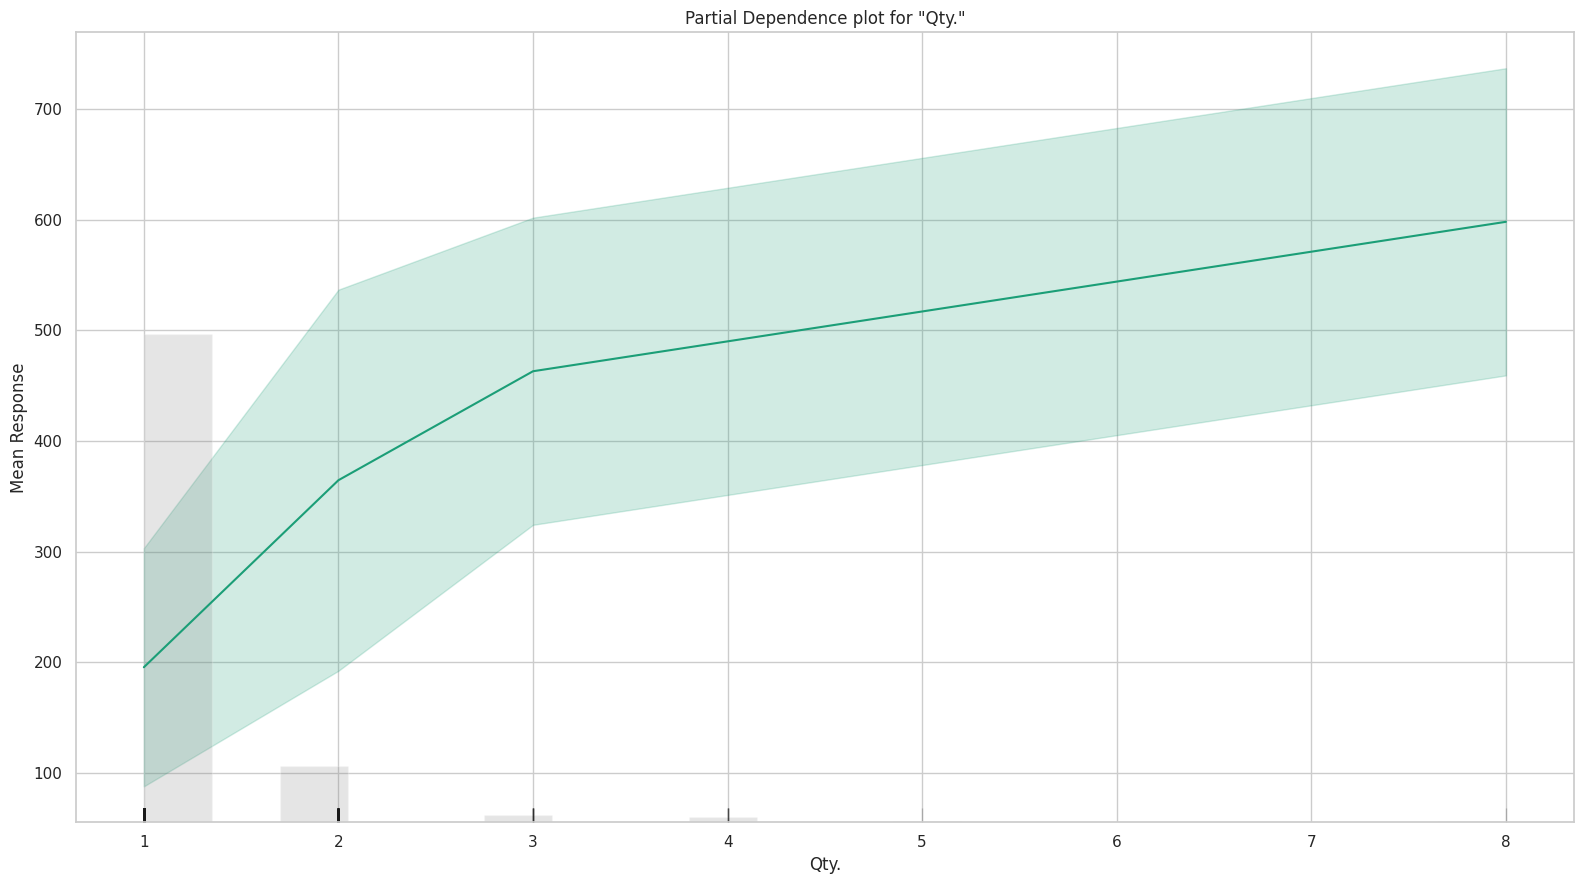

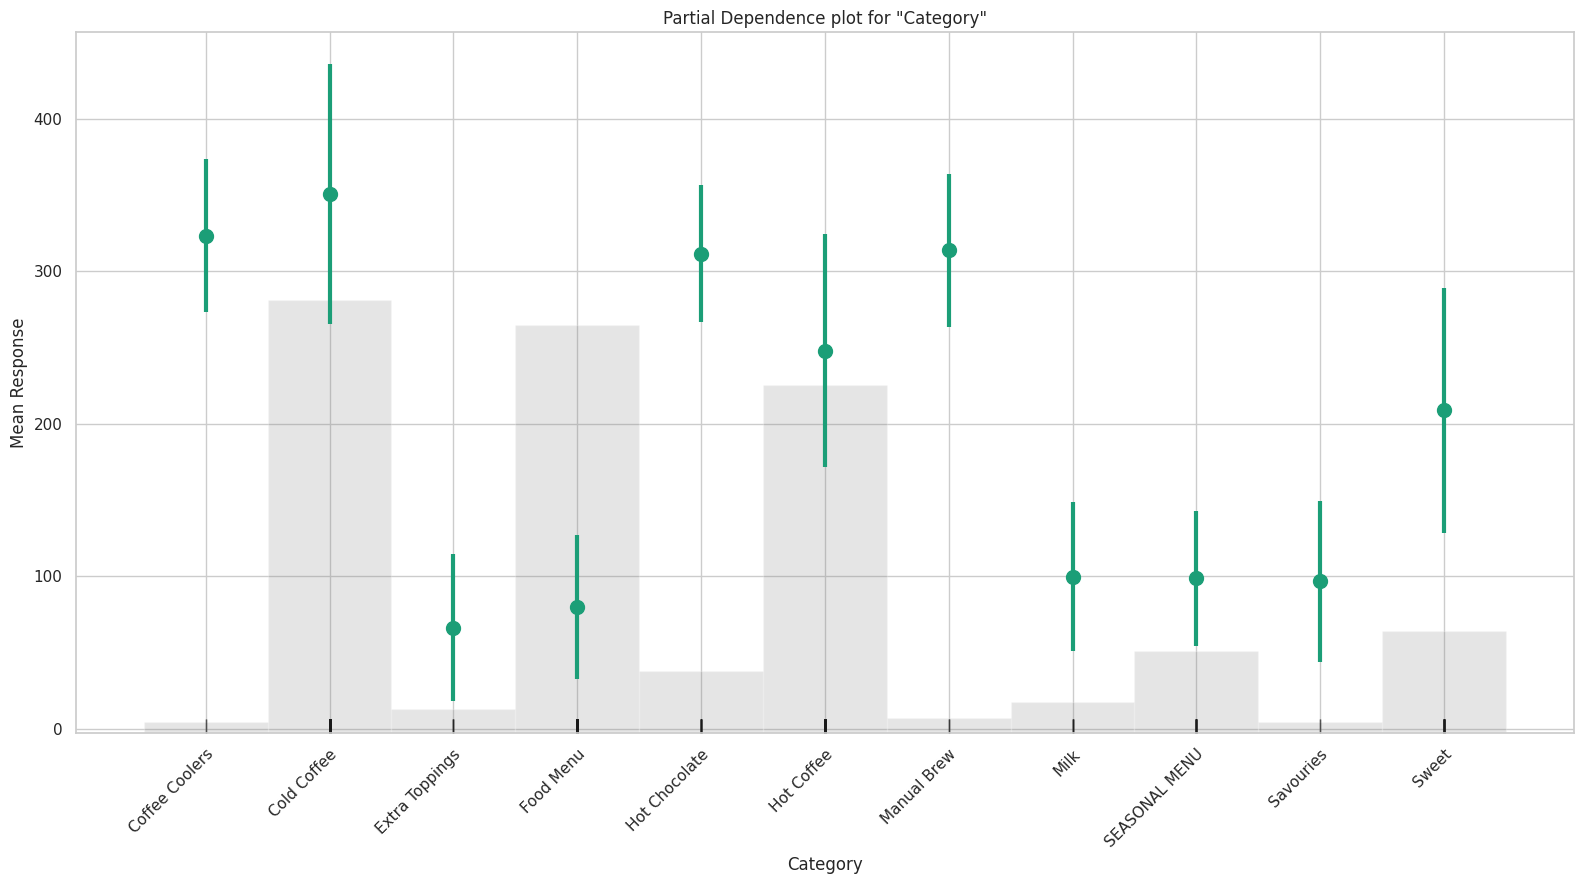

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

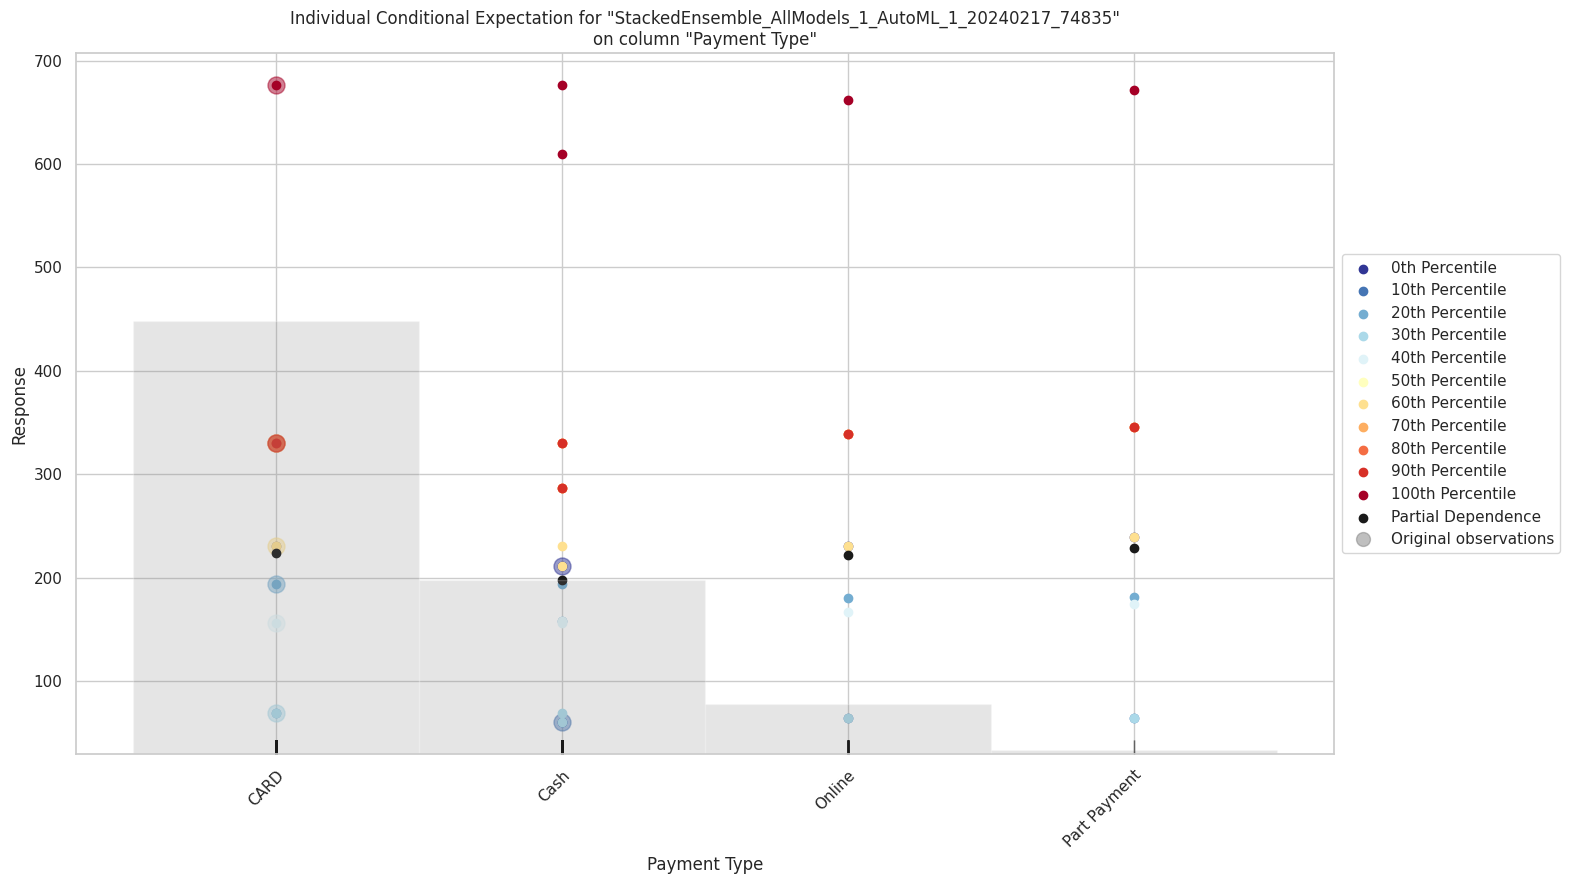

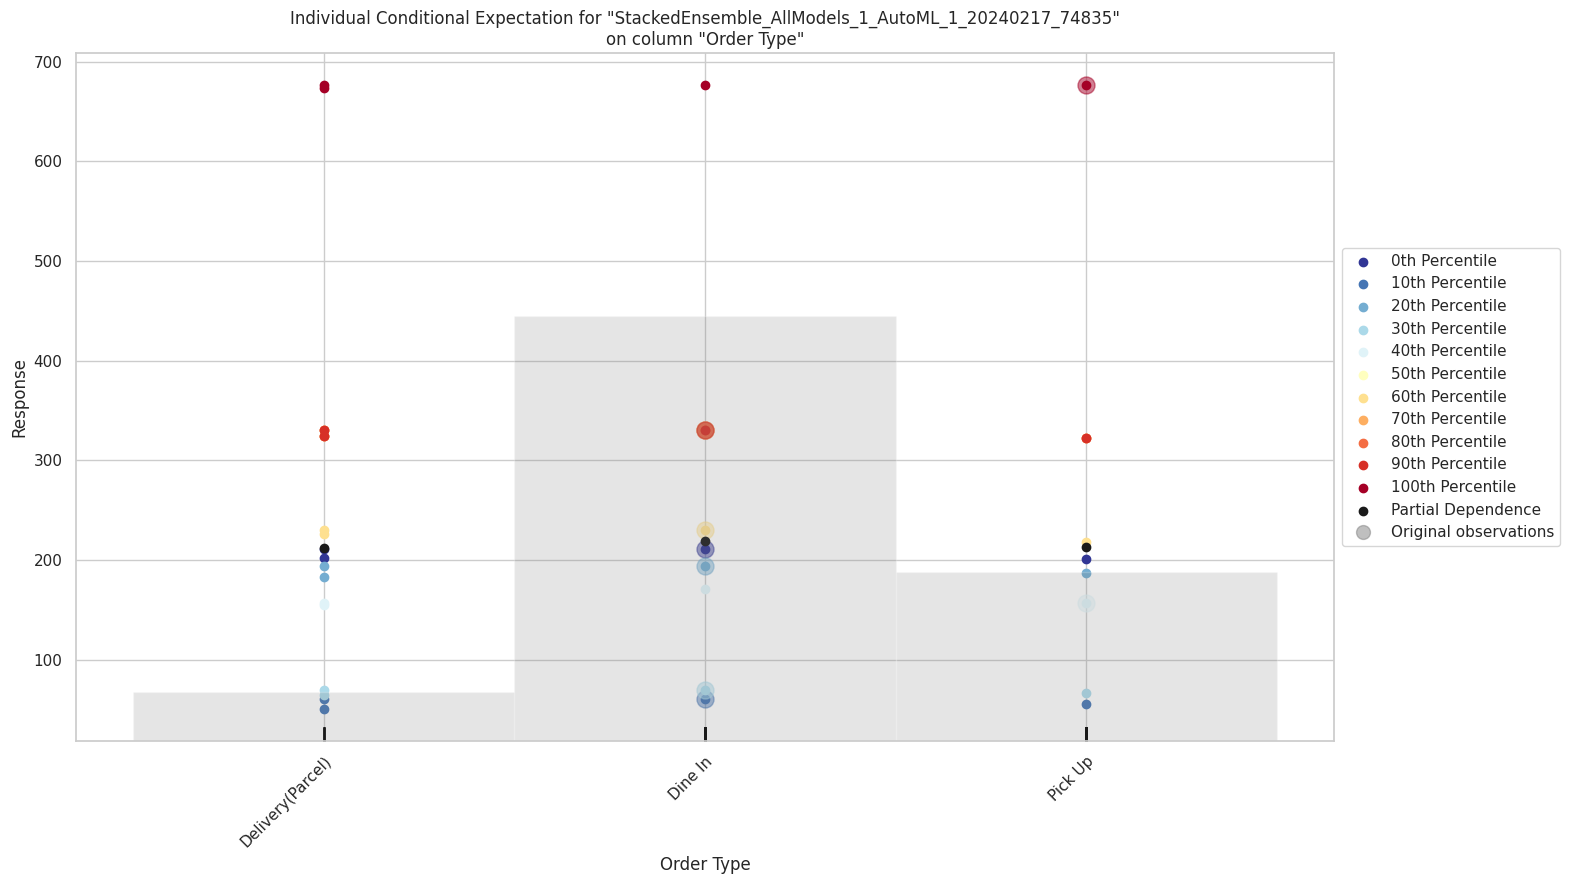

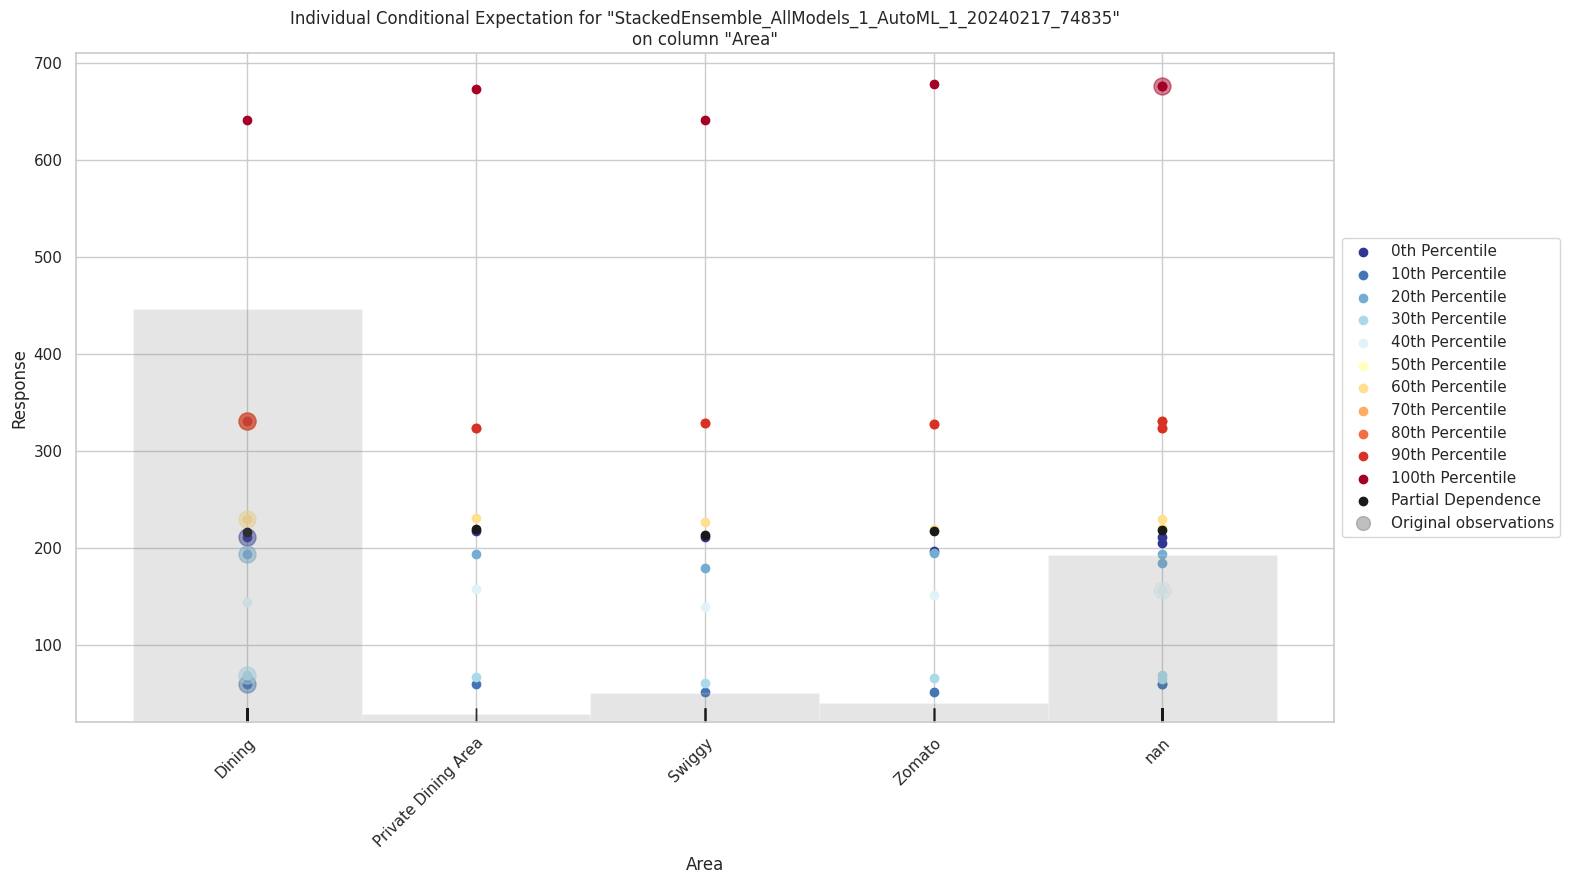

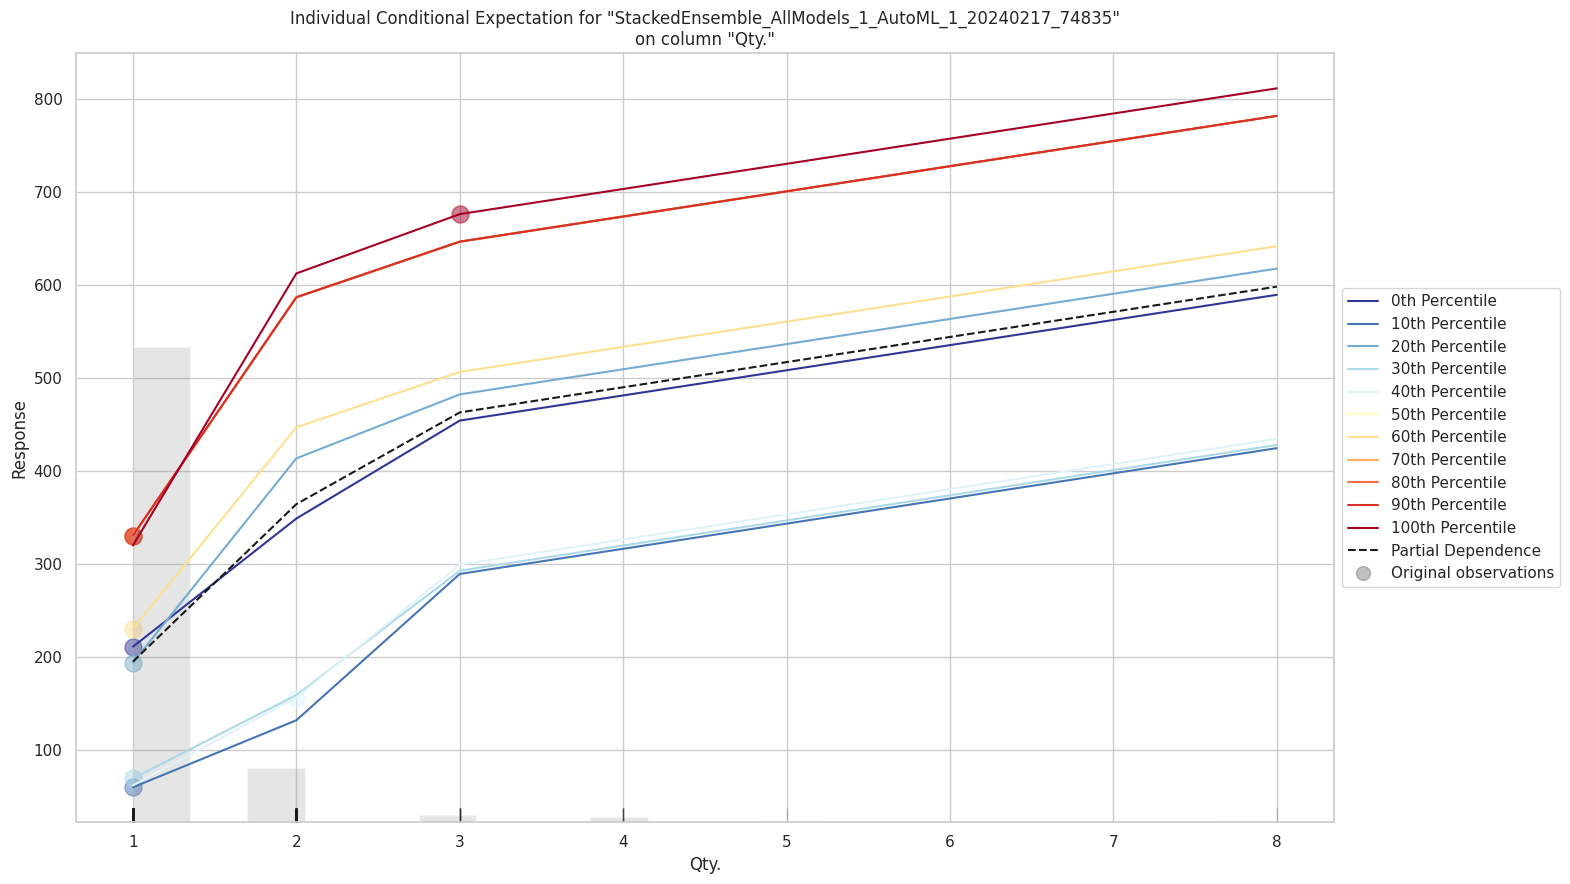

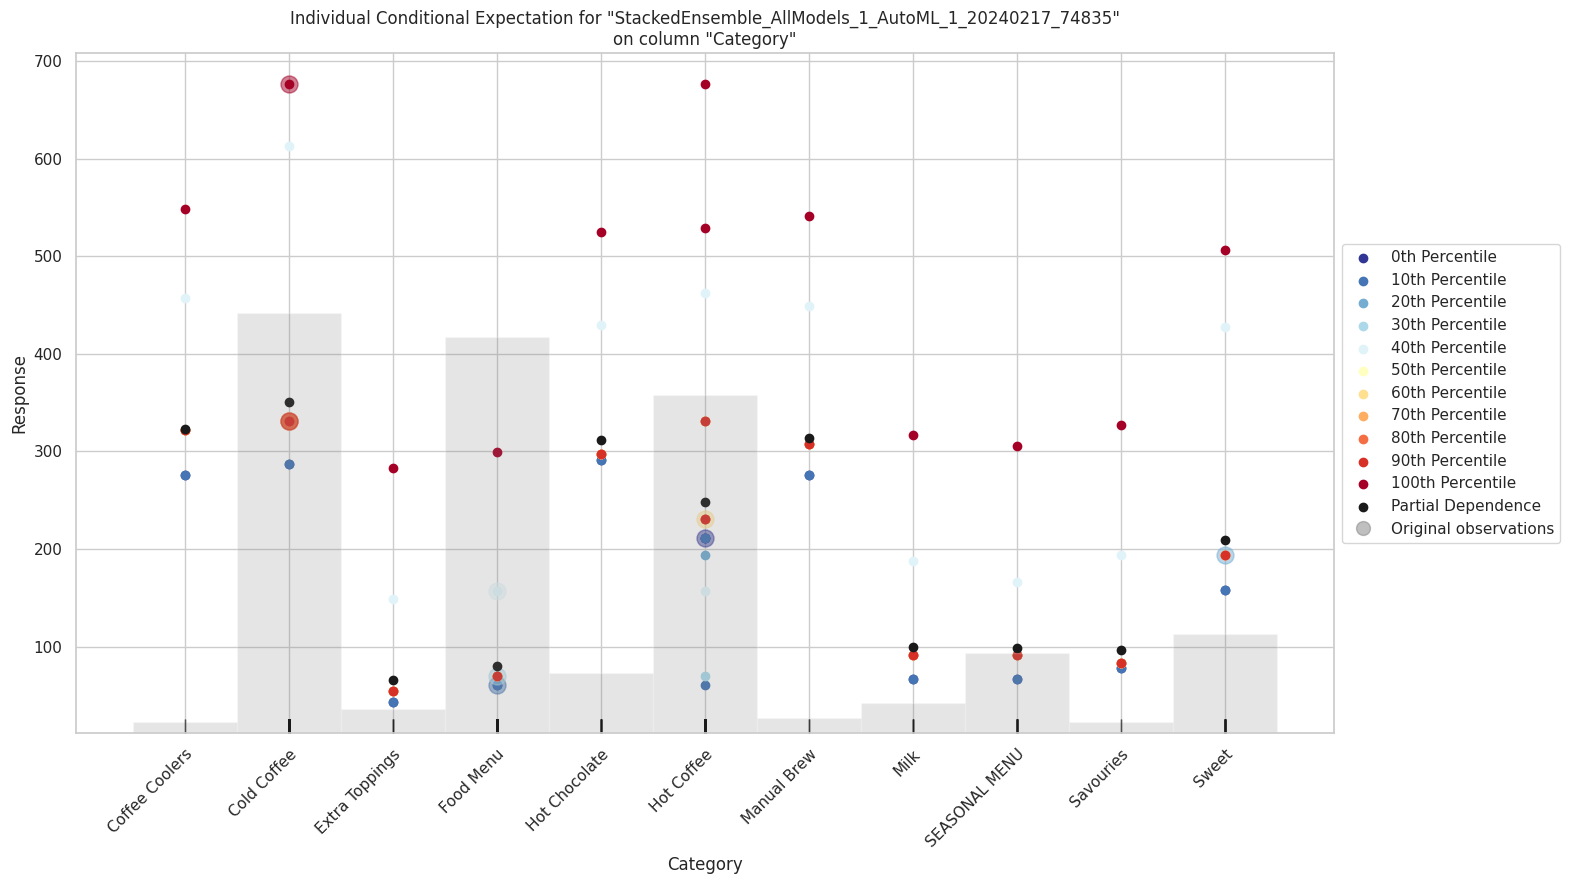

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

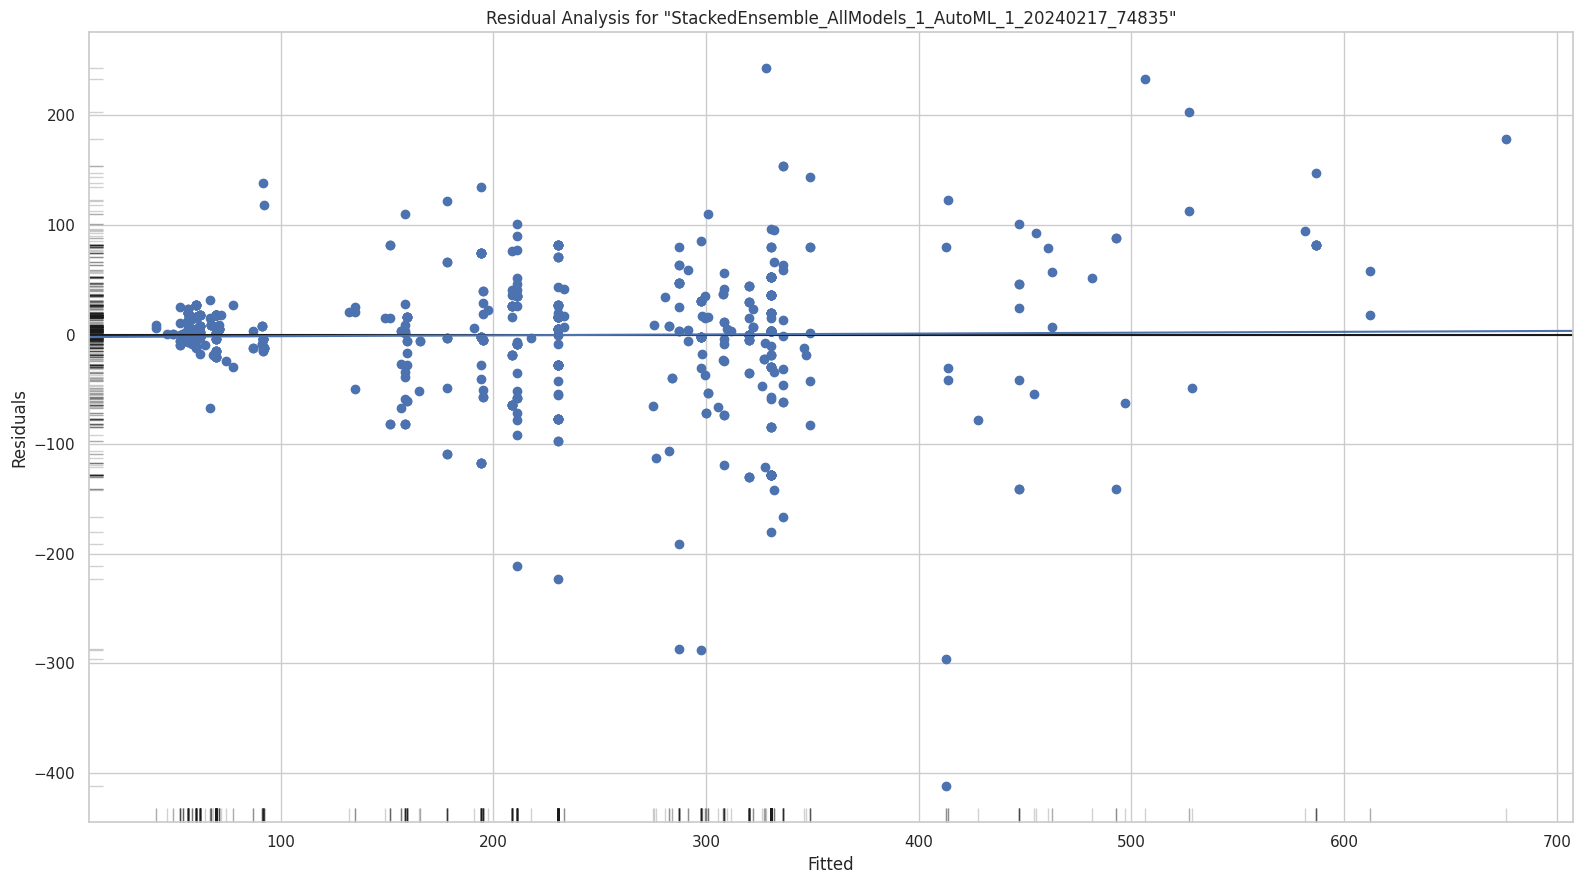

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

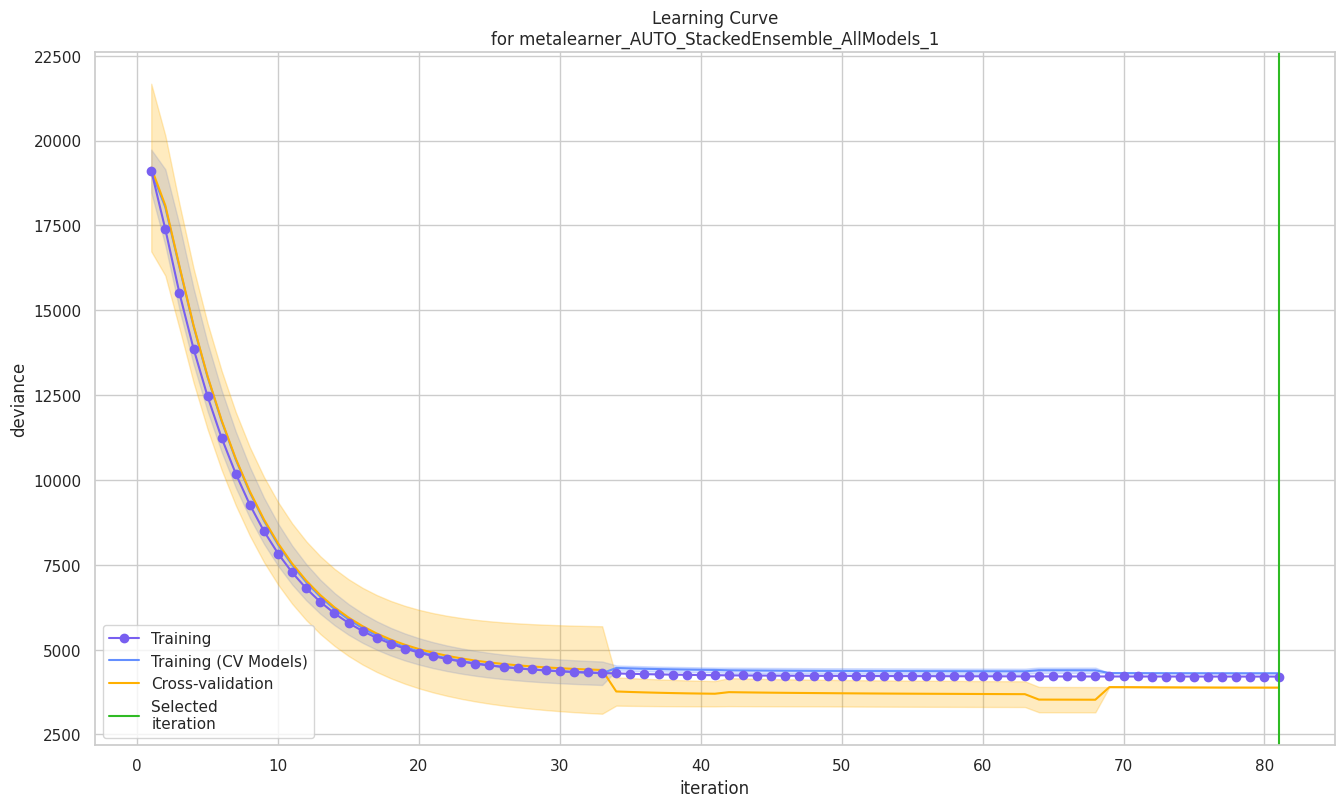

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

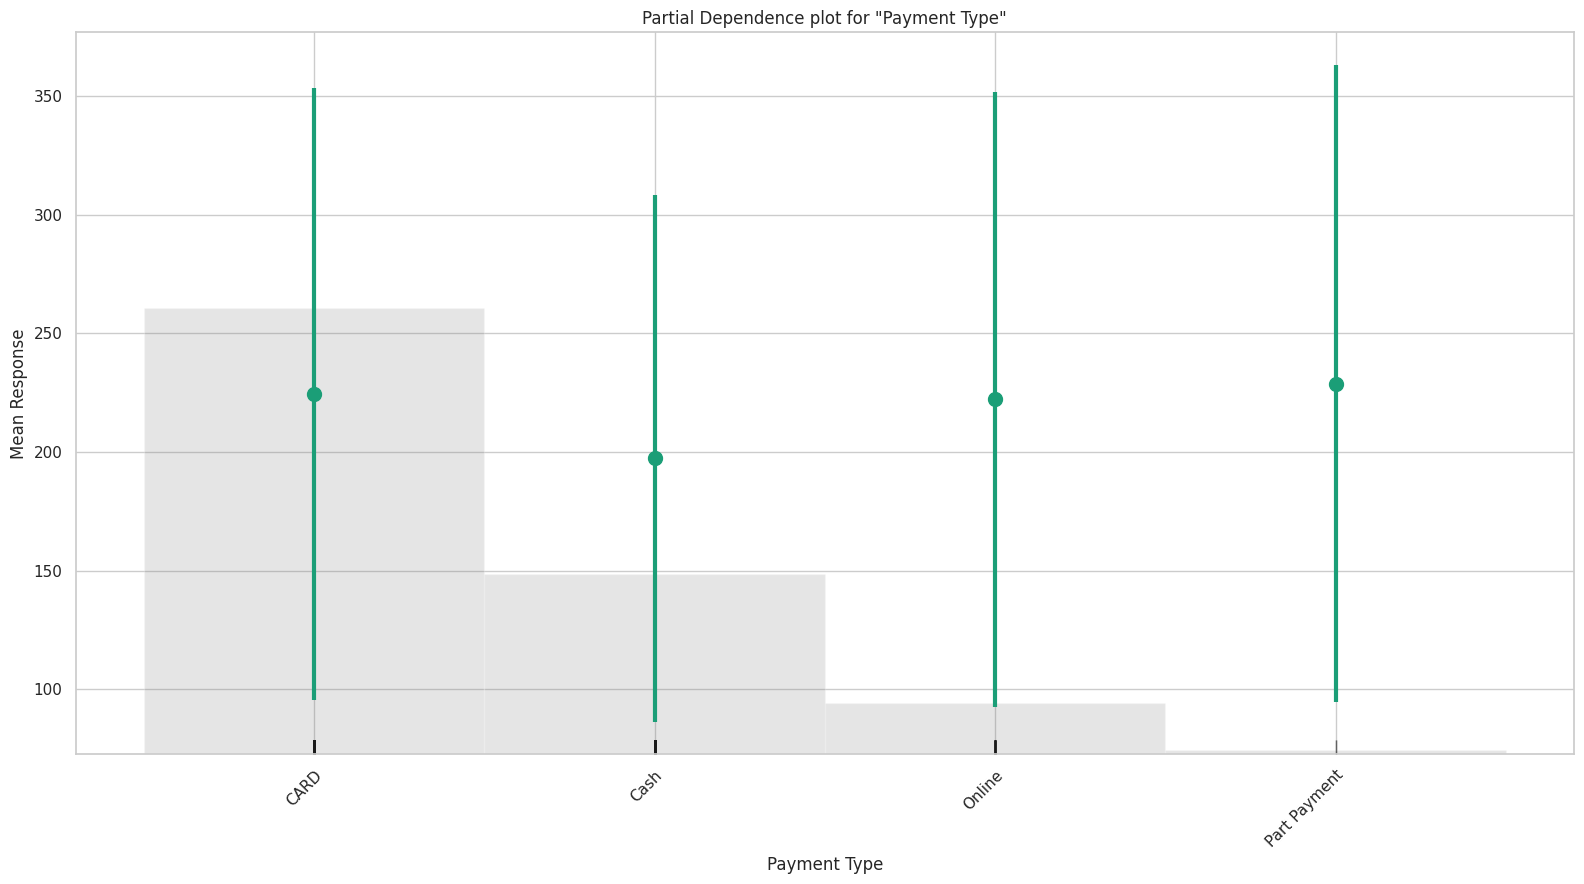

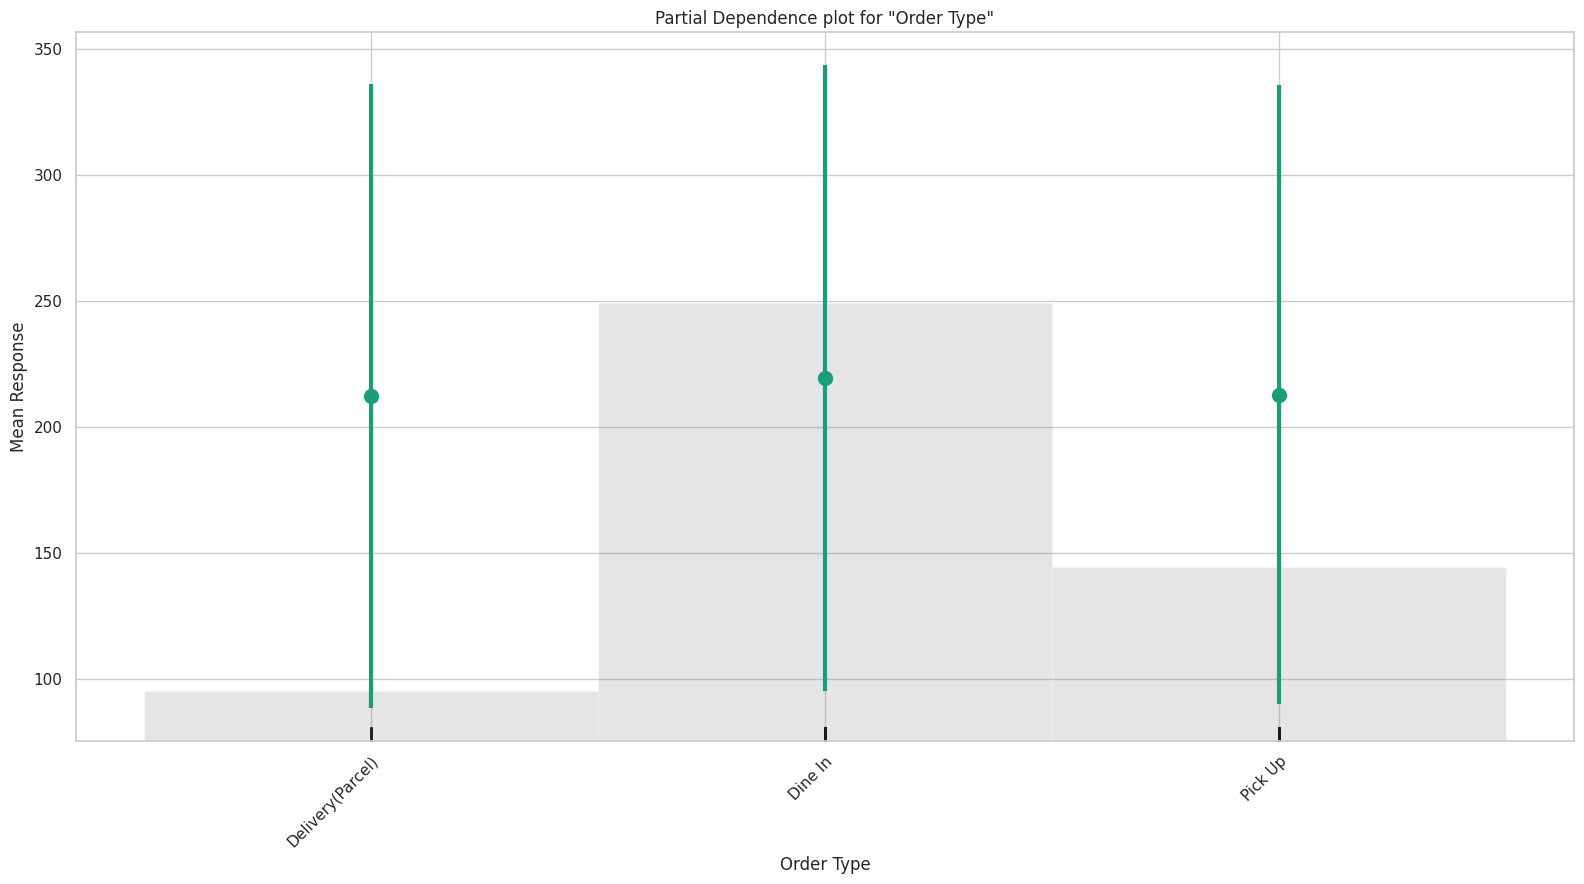

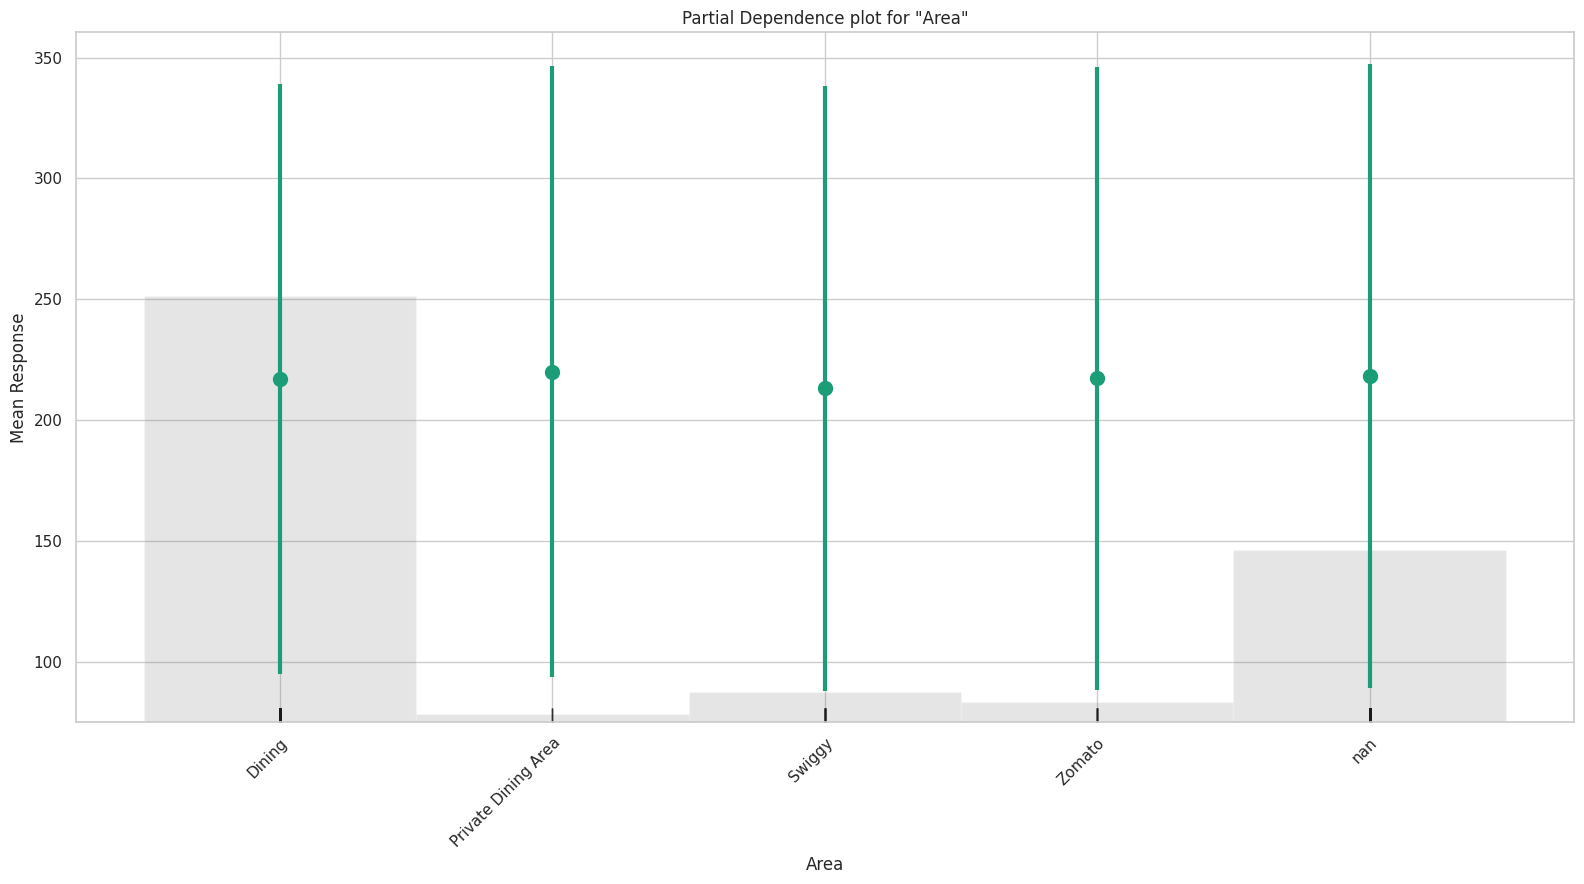

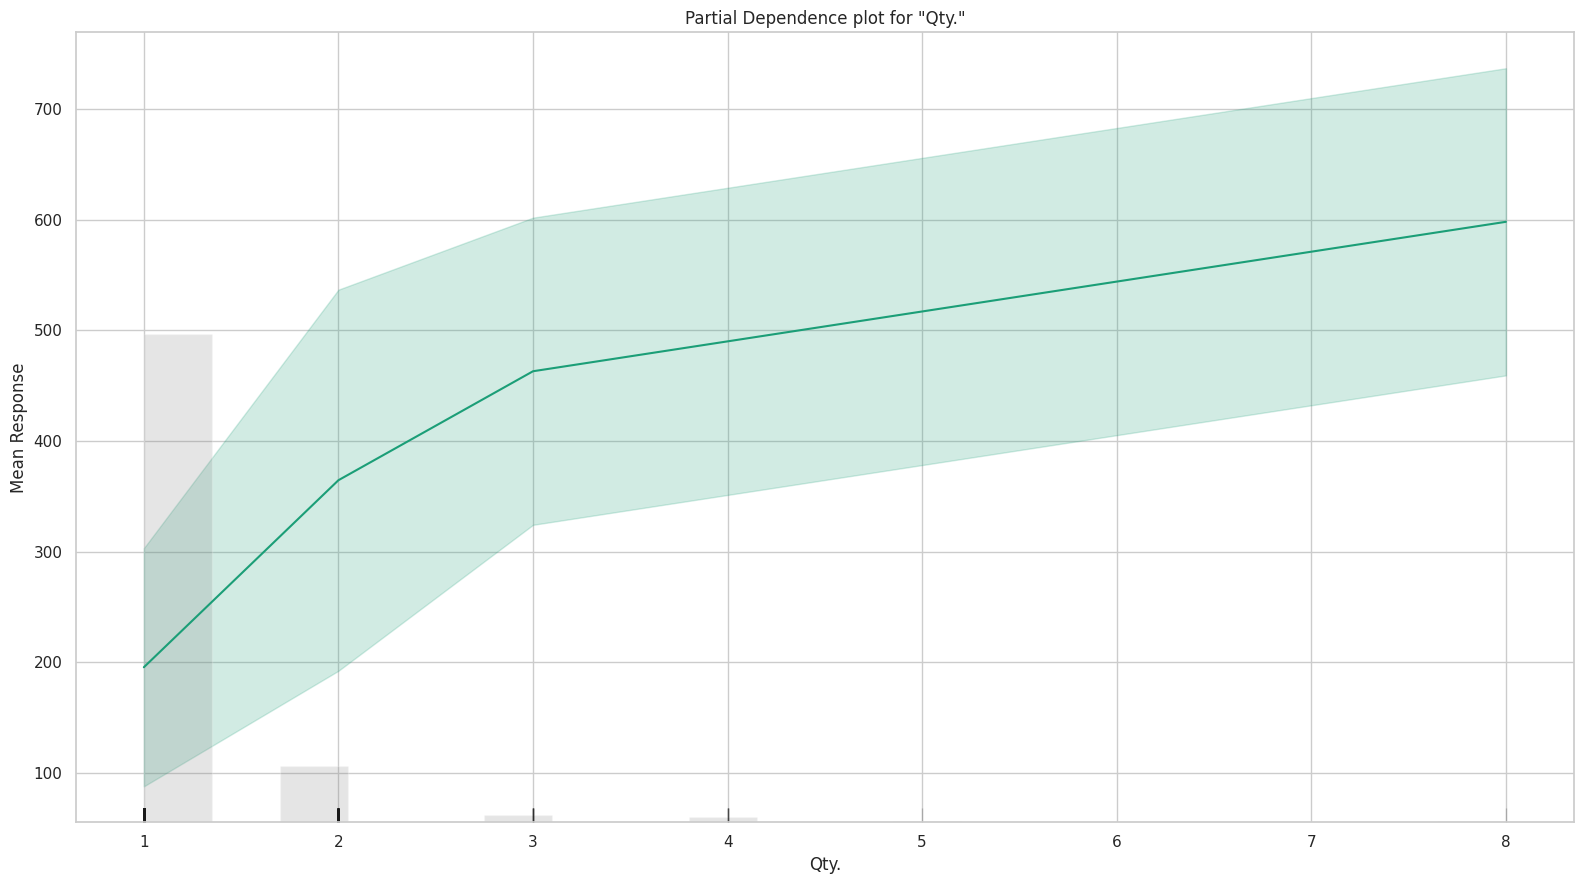

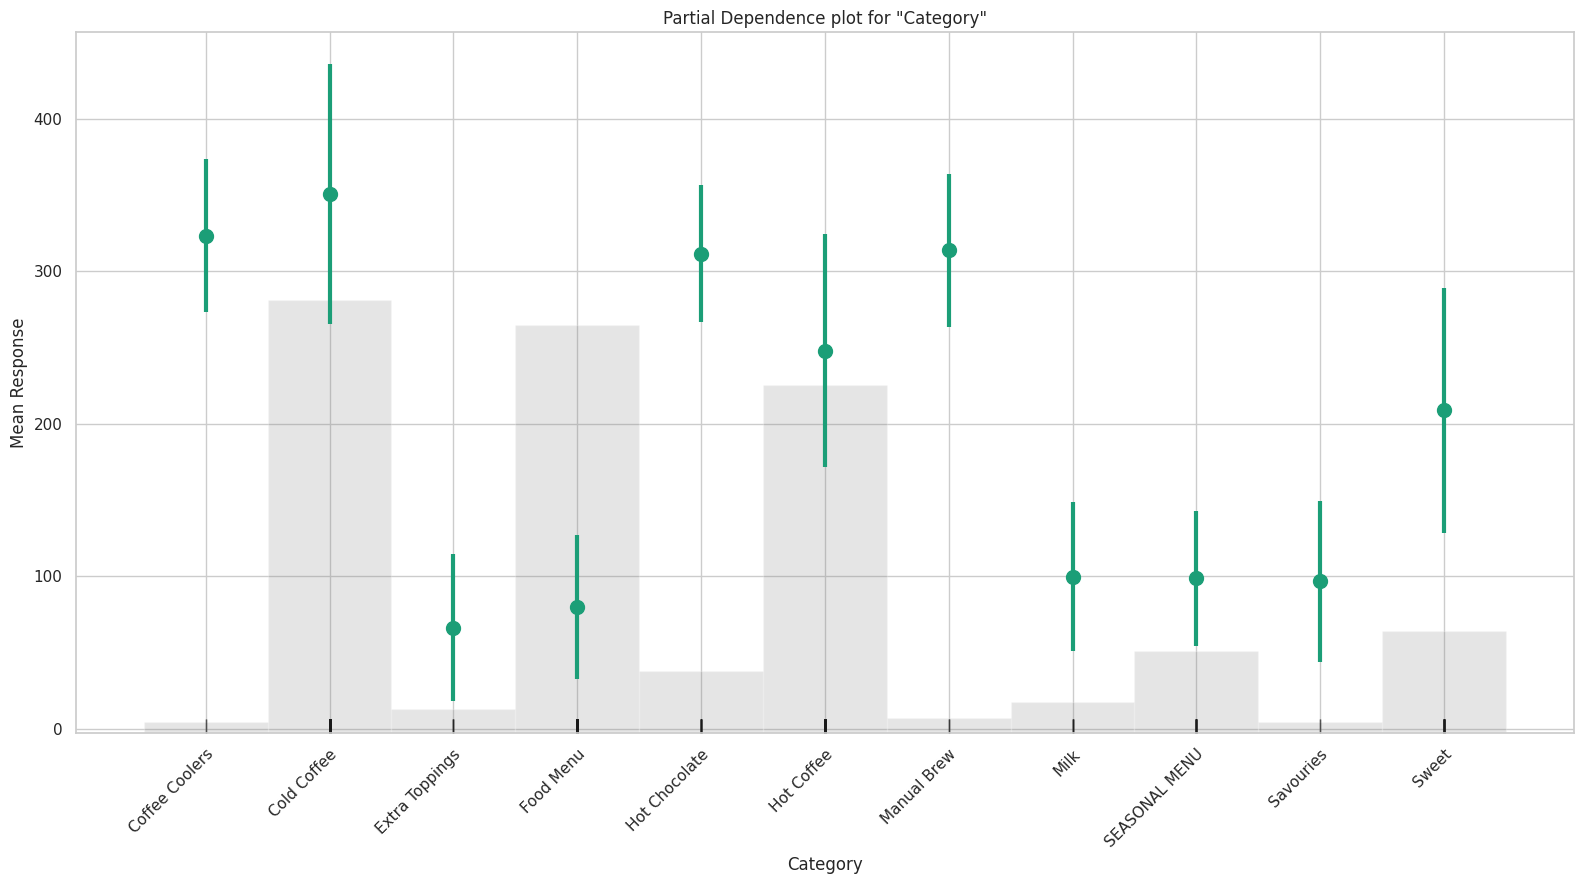

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

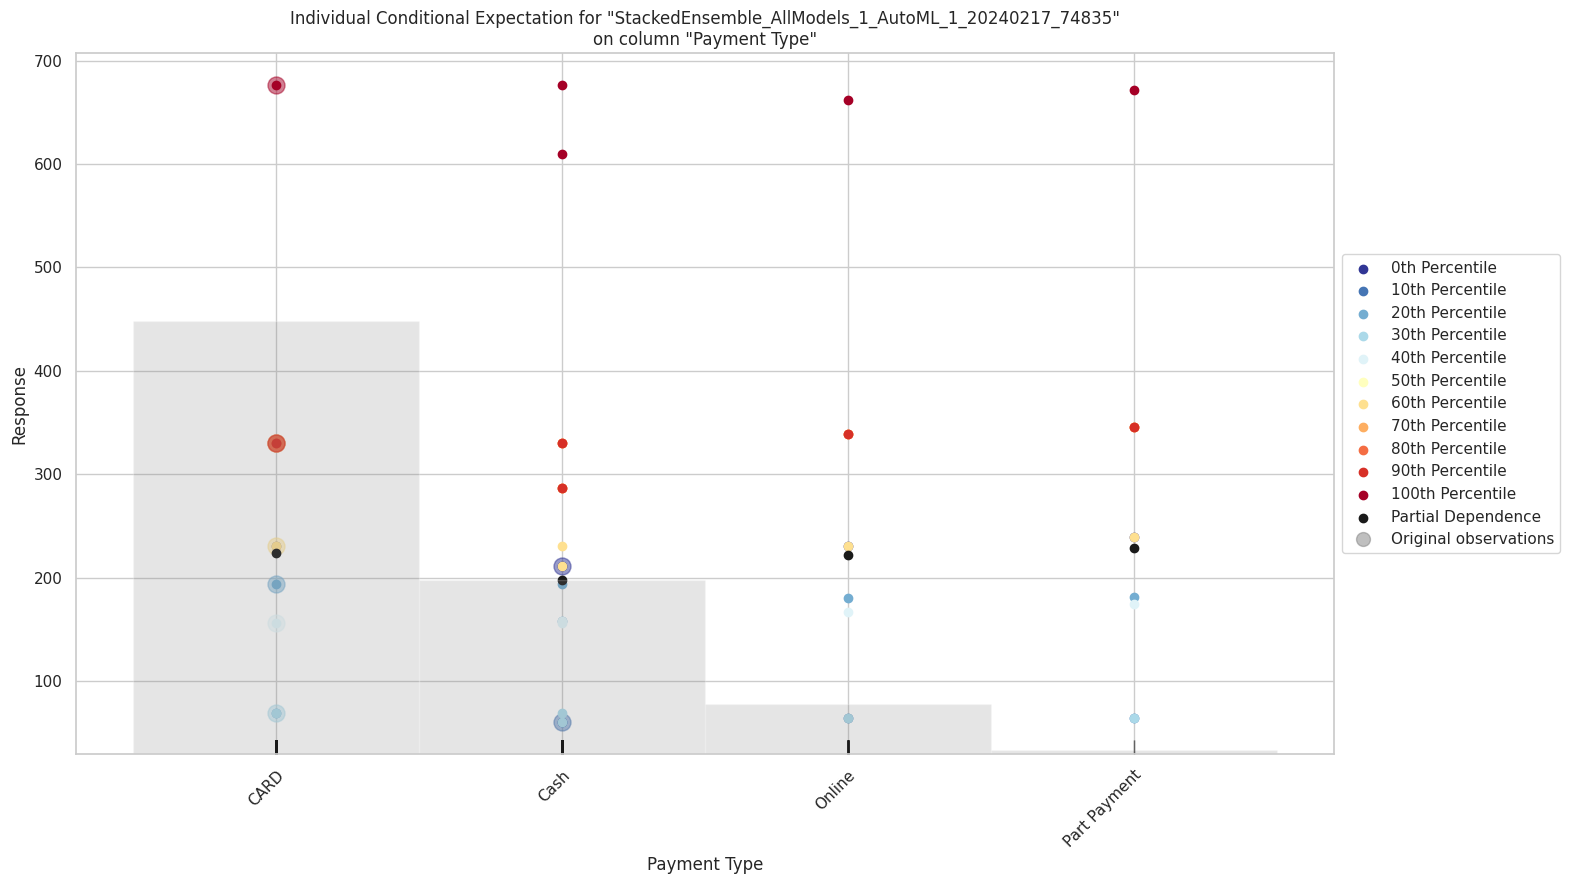

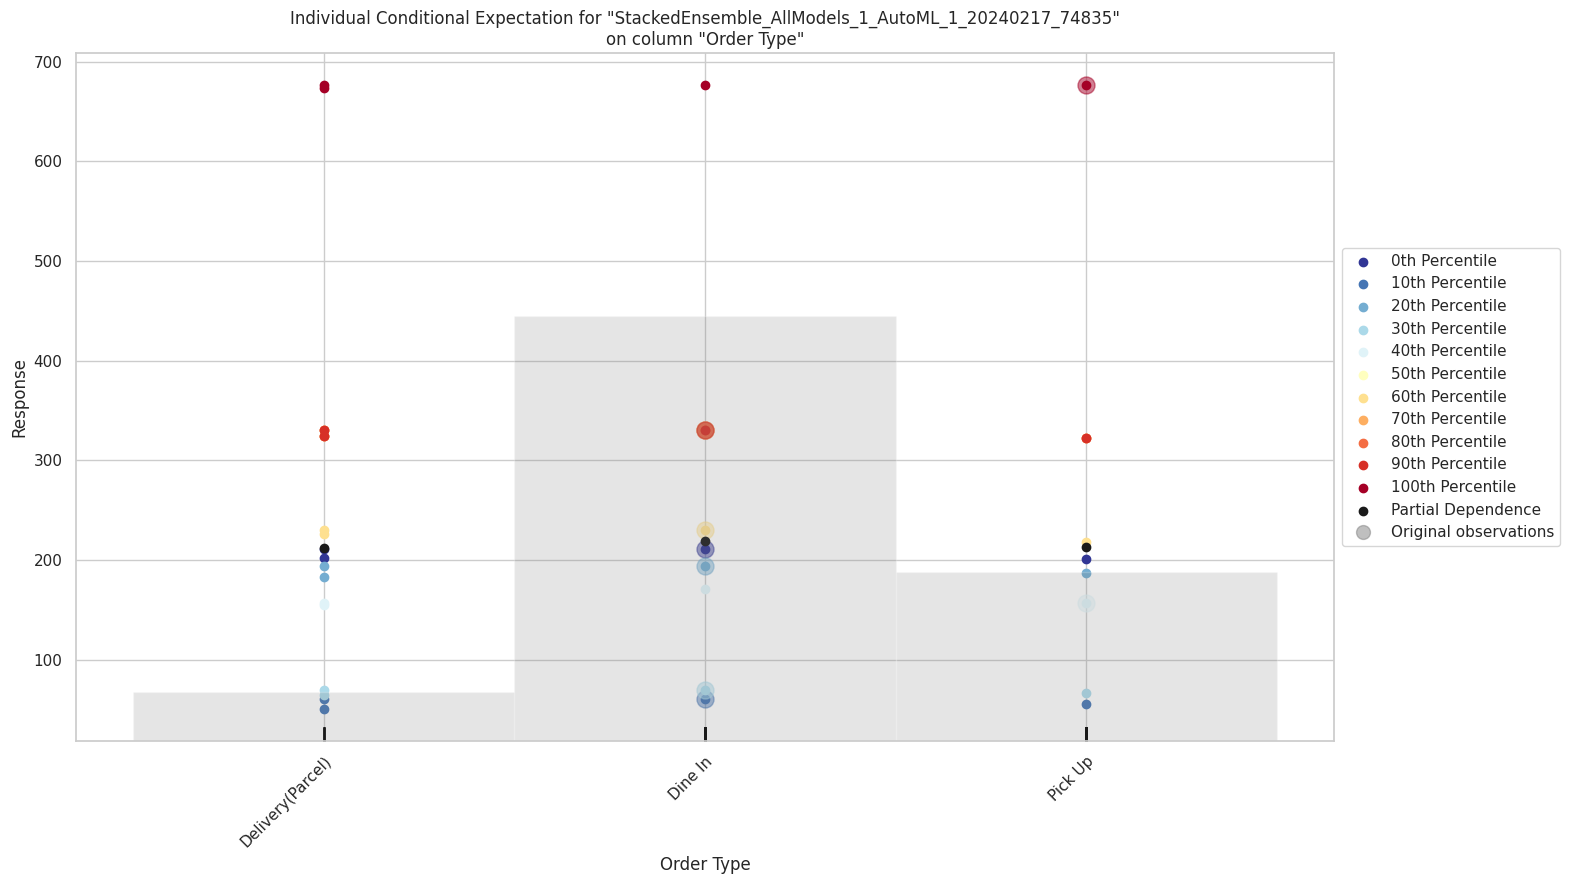

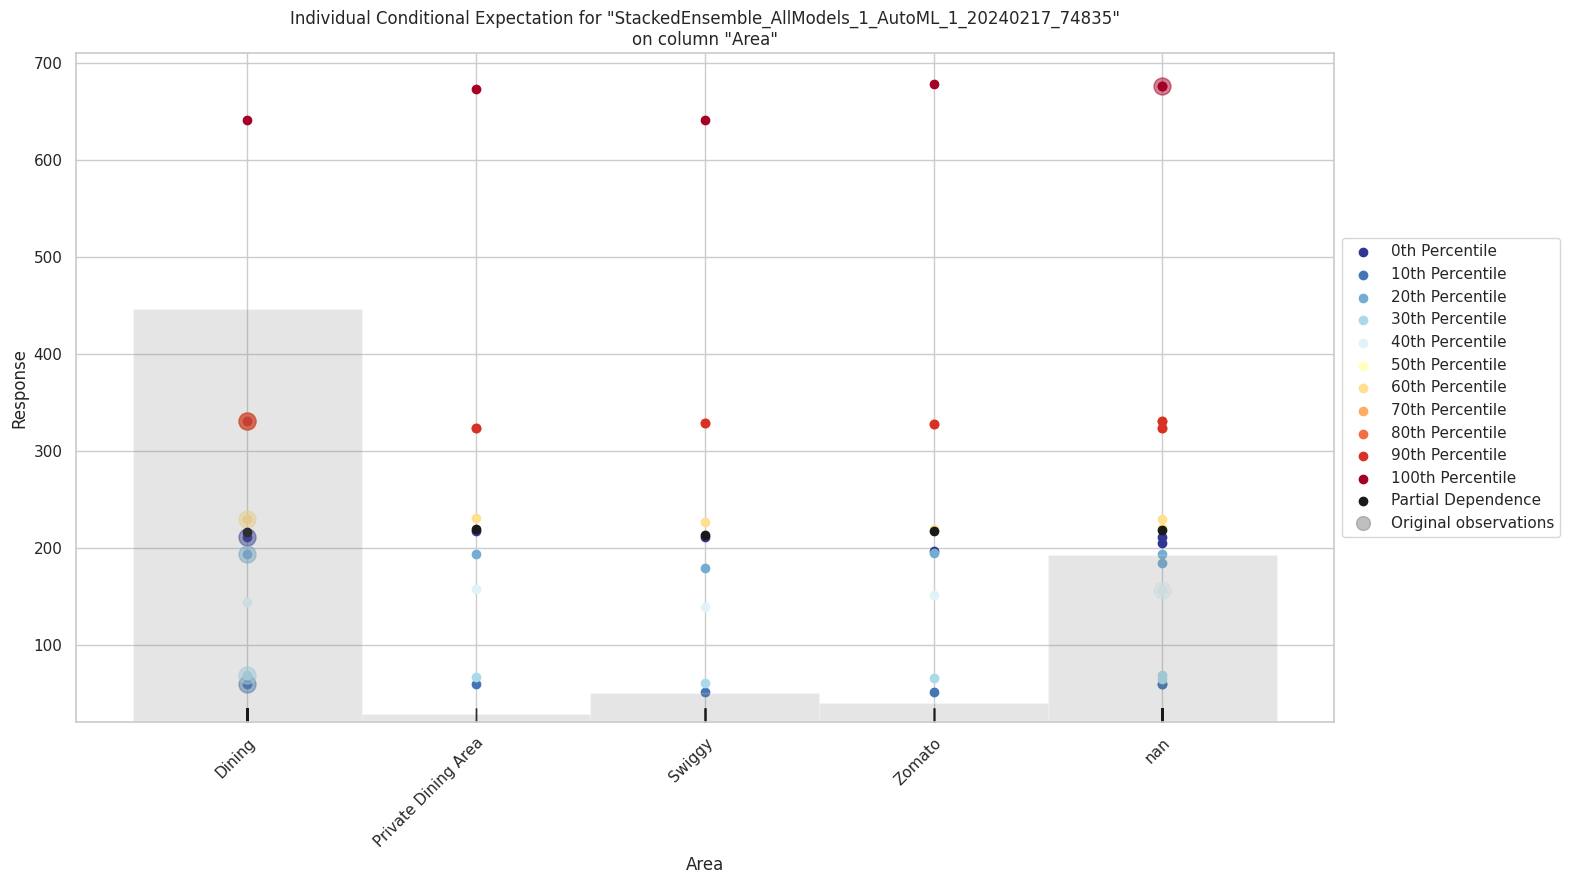

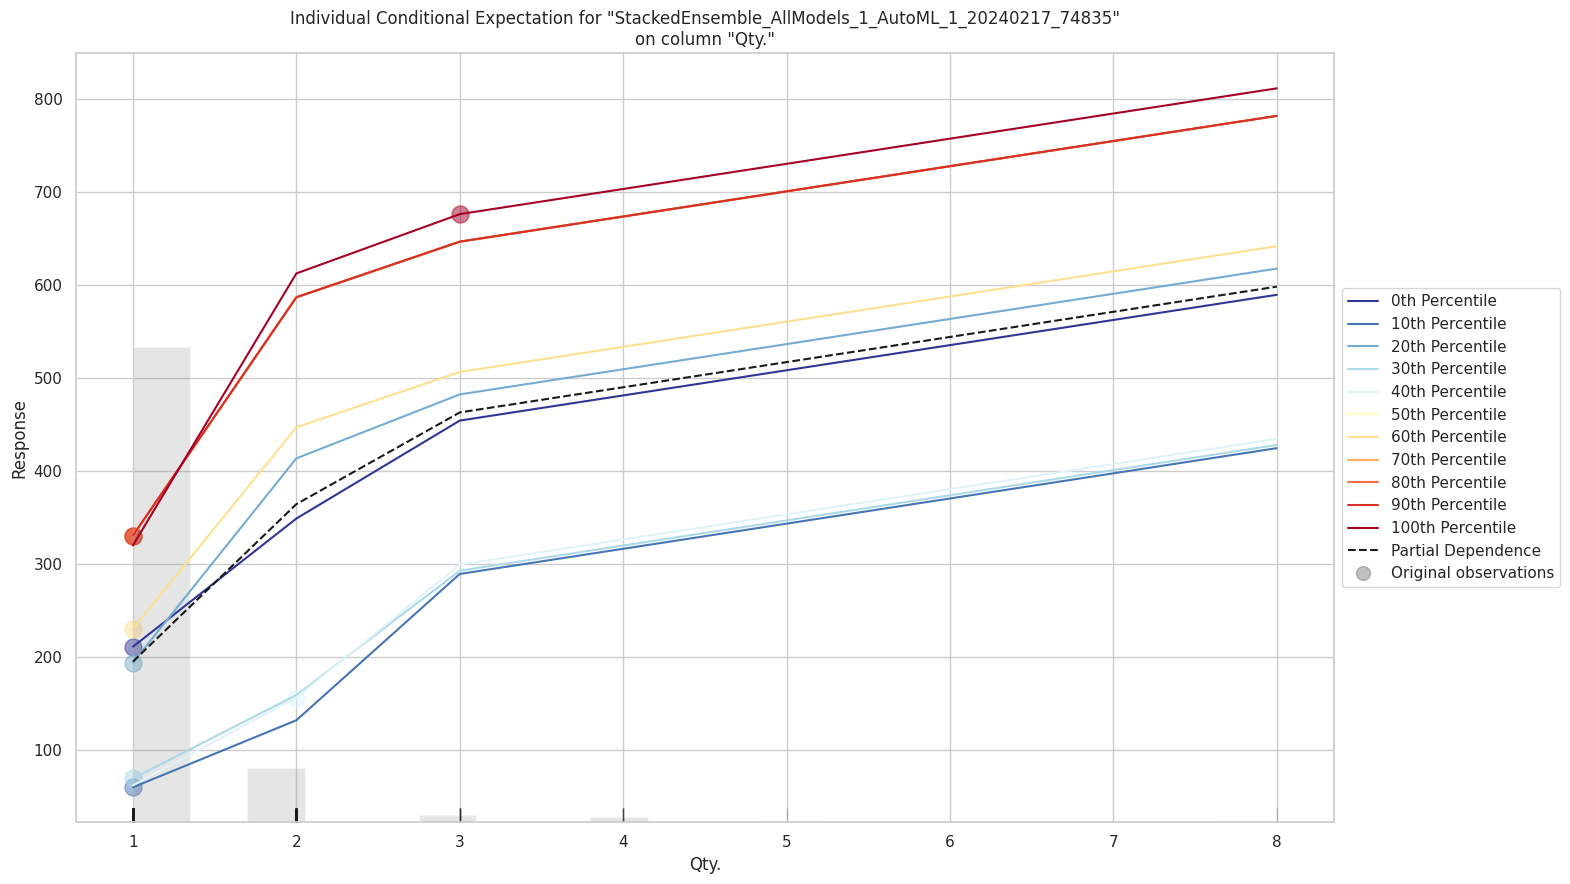

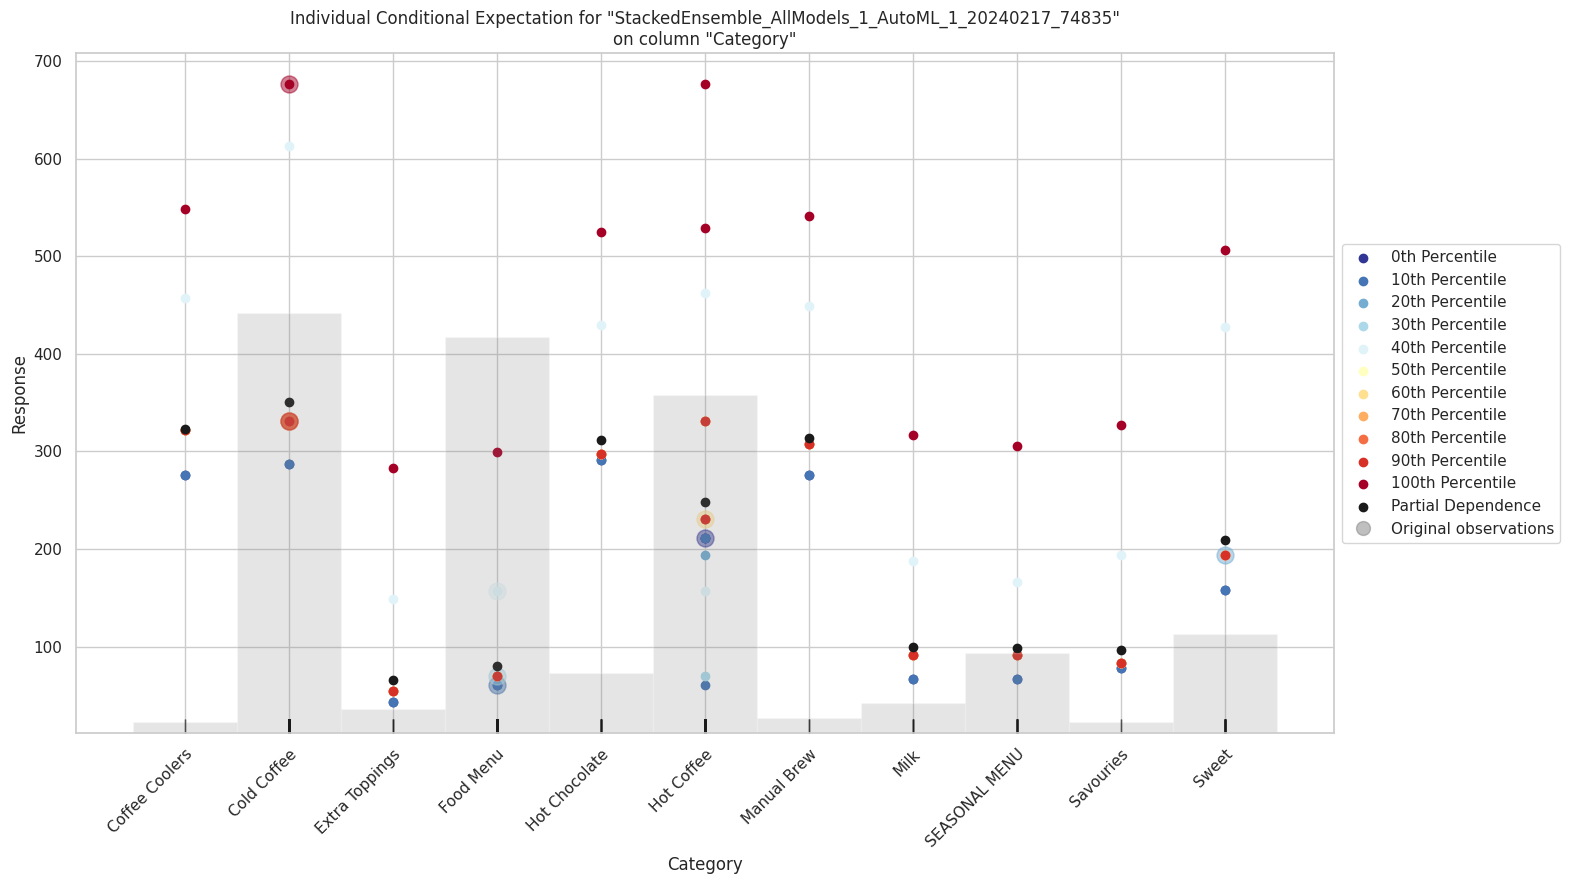

In [206]:
best_model = aml.leader
best_model.explain(h2o_df)

# Training an ML model to predict revenue

In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Assuming 'sales' is your DataFrame
selected_columns = ['Payment Type', 'Order Type', 'Area', 'Qty.', 'Final Total', 'Category']
data = sales[selected_columns].copy()

# One-hot encode categorical columns
categorical_columns = ['Payment Type', 'Order Type', 'Area', 'Category']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data, encoded_columns], axis=1).drop(categorical_columns, axis=1)

# Split the data into training and testing sets
X = data.drop('Final Total', axis=1)
y = data['Final Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [309]:
X_test.to_csv("testing_data.csv", index=False)

In [306]:
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [310]:
X_train.columns

Index(['Qty.', 'Payment Type_Cash', 'Payment Type_Online',
       'Payment Type_Part Payment', 'Order Type_Dine In', 'Order Type_Pick Up',
       'Area_Private Dining Area', 'Area_Room Service', 'Area_Swiggy',
       'Area_Zomato', 'Area_nan', 'Category_Coffee Coolers',
       'Category_Cold Coffee', 'Category_Combos [z]',
       'Category_Extra Toppings', 'Category_Food Menu',
       'Category_Hot Chocolate', 'Category_Hot Coffee', 'Category_JUICES',
       'Category_Manual Brew', 'Category_Milk', 'Category_SEASONAL MENU',
       'Category_Savouries', 'Category_Sweet'],
      dtype='object')

In [311]:
X_test.columns

Index(['Qty.', 'Payment Type_Cash', 'Payment Type_Online',
       'Payment Type_Part Payment', 'Order Type_Dine In', 'Order Type_Pick Up',
       'Area_Private Dining Area', 'Area_Room Service', 'Area_Swiggy',
       'Area_Zomato', 'Area_nan', 'Category_Coffee Coolers',
       'Category_Cold Coffee', 'Category_Combos [z]',
       'Category_Extra Toppings', 'Category_Food Menu',
       'Category_Hot Chocolate', 'Category_Hot Coffee', 'Category_JUICES',
       'Category_Manual Brew', 'Category_Milk', 'Category_SEASONAL MENU',
       'Category_Savouries', 'Category_Sweet'],
      dtype='object')

### Feature Importance

In [308]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

data = feature_importances_sorted.to_dict(orient='records')
data

Mean Squared Error: 4493.747831642113


[{'Feature': 'Qty.', 'Importance': 0.5774660664950066},
 {'Feature': 'Category_Food Menu', 'Importance': 0.20597712500160967},
 {'Feature': 'Category_Cold Coffee', 'Importance': 0.09508675117879249},
 {'Feature': 'Category_Hot Chocolate', 'Importance': 0.02531139029447857},
 {'Feature': 'Category_SEASONAL MENU', 'Importance': 0.0183763966807022},
 {'Feature': 'Category_Hot Coffee', 'Importance': 0.01614192117494065},
 {'Feature': 'Category_Milk', 'Importance': 0.010788411132490154},
 {'Feature': 'Category_Extra Toppings', 'Importance': 0.010525186415167467},
 {'Feature': 'Category_Sweet', 'Importance': 0.007394044418239329},
 {'Feature': 'Payment Type_Cash', 'Importance': 0.006346940402232472},
 {'Feature': 'Category_Savouries', 'Importance': 0.005348683165229106},
 {'Feature': 'Category_Manual Brew', 'Importance': 0.005298447132816135},
 {'Feature': 'Category_Coffee Coolers', 'Importance': 0.003640479965217027},
 {'Feature': 'Order Type_Dine In', 'Importance': 0.002214592277893275},
 

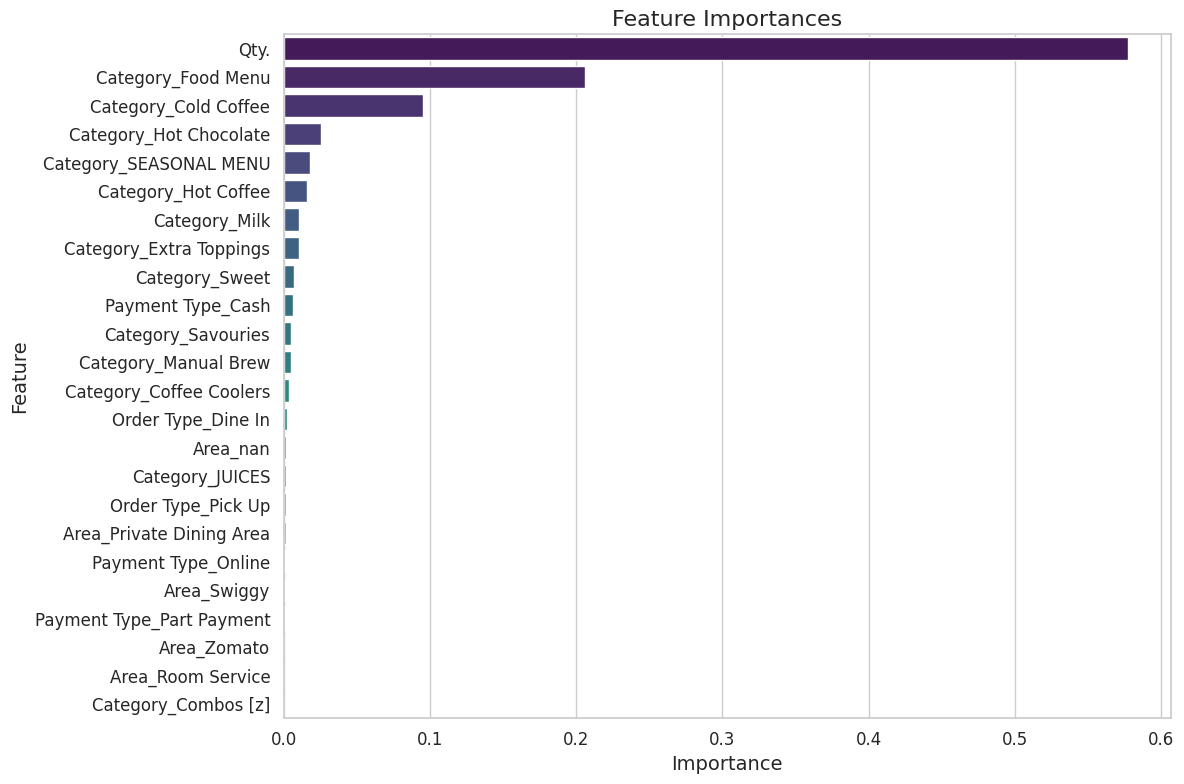

In [273]:

feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", n_colors=len(feature_importances_sorted))

ax = sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted, palette=colors)

plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [215]:
data = feature_importances_sorted.to_dict(orient='records')
data

[{'Feature': 'Category_Food Menu', 'Importance': 0.27616246362196295},
 {'Feature': 'Category_Cold Coffee', 'Importance': 0.2752511022114232},
 {'Feature': 'Qty.', 'Importance': 0.20724366270071176},
 {'Feature': 'Category_Hot Coffee', 'Importance': 0.038310887914619354},
 {'Feature': 'Payment Type_Cash', 'Importance': 0.0357593520512258},
 {'Feature': 'Category_SEASONAL MENU', 'Importance': 0.02983466633276717},
 {'Feature': 'Category_Hot Chocolate', 'Importance': 0.02666752270146719},
 {'Feature': 'Area_Private Dining Area', 'Importance': 0.018205042543052413},
 {'Feature': 'Category_Milk', 'Importance': 0.016843765249219995},
 {'Feature': 'Category_Sweet', 'Importance': 0.01425447867911347},
 {'Feature': 'Category_Extra Toppings', 'Importance': 0.011918405160323196},
 {'Feature': 'Order Type_Dine In', 'Importance': 0.010990583086547812},
 {'Feature': 'Order Type_Pick Up', 'Importance': 0.008453390479760384},
 {'Feature': 'Category_Manual Brew', 'Importance': 0.0077160473070920525},


In [222]:
features_list = [item['Feature'] for item in data]
importance_list = [item['Importance'] for item in data]

# Combine the lists into a single list
combined_list = [features_list, importance_list]

# Print the combined list
# Extract features and importances into two separate lists
features_list = [item['Feature'] for item in data]
importance_list = [item['Importance'] for item in data]

# Combine the lists into a single list
combined_list = [features_list, importance_list]

# Convert the combined list to a JSON-formatted string
combined_list = [features_list, importance_list]

# Write the combined list to a JSON file
with open('output.json', 'w') as json_file:
    json.dump(combined_list, json_file)

In [217]:
import json
with open('feature_importances.json', 'w') as json_file:
    json.dump(data, json_file)

In [303]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4493.747831642113
R-squared: 0.817289893088296


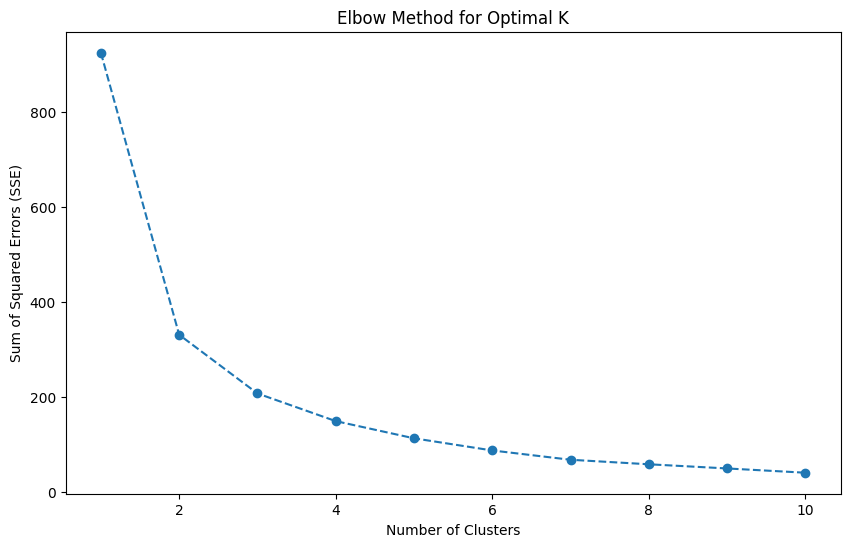

         Frequency      Monetary
Segment                         
0         1.372596    764.406466
1        12.647059   9888.002353
2         6.821429   4241.543571
3        29.000000  23872.660000


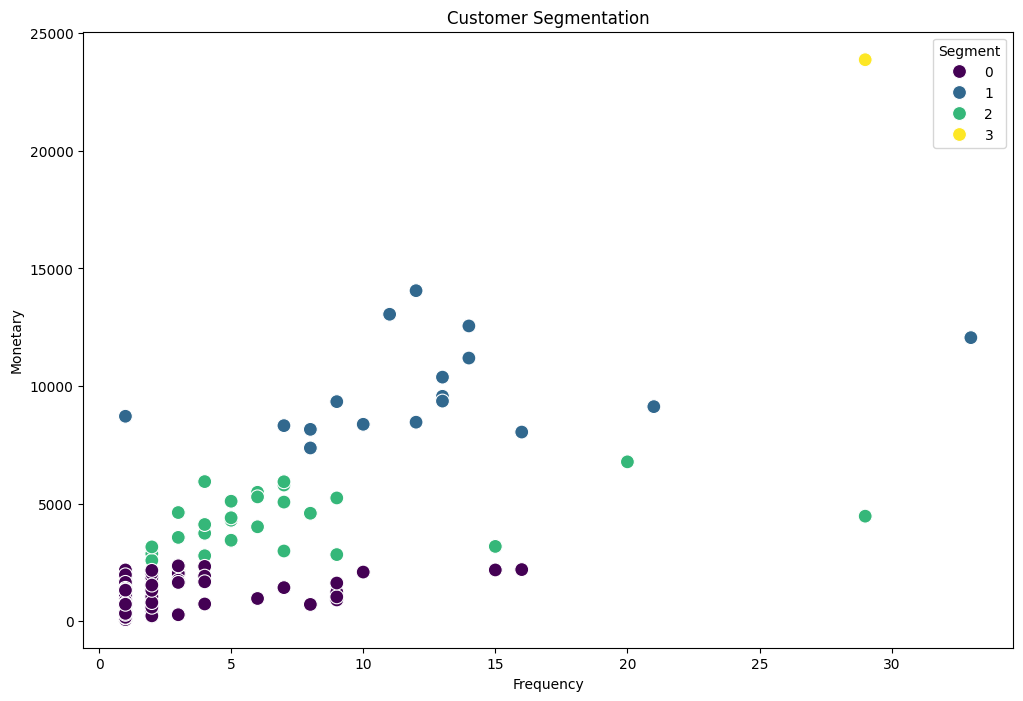

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def find_optimal_k(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

def apply_kmeans(data, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Segment'] = kmeans.fit_predict(data)
    return data


# Aggregate data to calculate 'Frequency' and 'Monetary'
customer_data = sales.groupby('Phone').agg({'Invoice No.': 'nunique', 'Final Total': 'sum'})

customer_data.rename(columns={'Invoice No.': 'Frequency', 'Final Total': 'Monetary'}, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

sse_values = find_optimal_k(scaled_data)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sse_values) + 1), sse_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4

customer_data = apply_kmeans(customer_data.copy(), optimal_k)

segment_characteristics = customer_data.groupby('Segment').agg({'Frequency': 'mean', 'Monetary': 'mean'})

segment_characteristics.rename(columns={'Phone': 'Customer Count'}, inplace=True)

print(segment_characteristics)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=customer_data, palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Segment')
plt.show()


In [30]:
print(segment_characteristics)


         Frequency      Monetary
Segment                         
0         1.372596    764.406466
1        12.647059   9888.002353
2         6.821429   4241.543571
3        29.000000  23872.660000


In [288]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'SGST Rate', 'SGST Amount', 'CGST Rate', 'CGST Amount', 'DayOfWeek',
       'HourOfDay'],
      dtype='object')

In [31]:
# Add Segment information to the original dataset
sales_with_segment = pd.merge(sales, customer_data[['Segment']], left_on='Phone', right_index=True)

# Display customer distribution within each segment
segment_counts = sales_with_segment['Segment'].value_counts()
print(segment_counts)

0    1397
1     664
2     499
3      97
Name: Segment, dtype: int64


In [35]:
# Extract columns 'Item Name' and 'Price' from 'sales'
item_prices = sales[['Item Name', 'Price']]

# Drop duplicate rows based on 'Item Name' to keep unique items
unique_items = item_prices.drop_duplicates(subset='Item Name')

# Display the DataFrame with unique item names and prices
unique_items

Item Name   Price
0                                          ORANGE JUICE  285.71
1                                   Iced Latte (350 ML)  214.29
2                                  ALMOND MILK (200 ML)   85.71
3                                       Chicken Calzone   66.67
4                          Coconut Nankhatai (with Egg)  285.71
...                                                 ...     ...
5669                          Spicy Banana Chips  60 Gm   57.14
5750             Mix Berliner  2 Pcs (Nutella Berliner)   61.90
5751  Mix Berliner  2 Pcs (Blueberry Cheese Cake Ber...   61.90
5968       Mix Berliner  2 Pcs (Lotus Biscoff Berliner)   61.90
5969   Mix Berliner  2 Pcs (Dark Choco Mousse Berliner)   61.90

[192 rows x 2 columns]

In [37]:
unique_items.to_csv('items_with_price.csv', index=False)

In [36]:
sales['Item Name'].nunique()

192

In [34]:
sales_with_segment.to_csv('sales_with_segment.csv', index=False)